<a href="https://colab.research.google.com/github/gcosma/COP509/blob/main/CoLA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Data Science For Good : CoLA**

**Task Overview**

The workforce at The City of Los Angeles serve as the backbone for a number of services. As an organization, they are in a unique hiring situation. One-third of their workers are retiring very soon and they have opened a number of job roles. The organization wants to improve the job bulletins that will fill all the open positions. Most of this data is present in unstructured form and it needs to be converted into a structured format before it can be analysed and obtain actionable insights. The content, tone, and format of job bulletins can strongly influence the quality of the applicants. Also, within such a huge organization, it also becomes difficult to clearly identify which promotions are available.

Key Objectives: Keeping these challenges in mind, an ideal solution for the City of Los Angeles has following key objectives: Develop an nlp framework to accurately structurize the job descriptions. Develop an analysis framework to identify the implict bias in the text and encourage diversity. Develop a system which can clearly identify the promotion pathways within the organization.

My Submission: Following are parts of Kernels Submissions in order:

Part 1: Job Bulletin Structuring Engine - City of Los Angeles

Part 2: Encourage Diversity and Remove Unconsious Bias from Job Bulletins - A Deep Analysis

Part 3: Impact of Content, Tone, and Language : CTL Analysis for CoLA

Part 4: Increasing the Discoverability of Promotional Pathways (Explicit)

Part 5: Implicit Promotional Pathways Discoverability

In the first kernel, a complete job bulletin entity extraction and data structuring engine is developed. In the second kernel, a deep analysis of unconscious bias is performed and a framework is shared to validate and reproduce the results. In the third kernel, impact of content, tone, and language is measured. And finally, in the last two kernels, a methodology is shared to visualize the promotion pathways (both explict and implict) and identifying the possible promotions pathways for a role.

###***pre-work: mount drive***

In [76]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Part 2: Encourage Diversity and Remove Unconsious Bias from Job Bulletins - A Deep Analysis**

The aim of this kernel is to analyse, measure, and quantify unconscious (or implicit) bias present in the job bulletin's of City of Los Angeles. This kernel uses bag of words, dictionary approch to check the presence of certain category of keywords in the text, it then applies different normalization techniques in order to quantify the amount of unconscious bias present in the text. Different data visualizations are used to showcase the key insights and related trends. In the end, I perform a simulation experiment to validate the hypothesis.

Table of Contents

1. What is Diversity Hiring?

2. Unconscious Gender Bias in City's Bulletins
    2.1 Use of Gendered Keywords in City's Bulletins

    2.2 Measuring the gender bias in City's Bulletins

    2.3 Bulletins with High Masculine (or Feminine) Denotation

    2.4 Masculine and Feminine Words Usage

    2.5 Does (Masculine) Jobs are Offered Higher Salaries ?

    2.6 Does More Masculine Class means Higher Salary?

    2.7 Does Job Seniority Levels also show Gender Bias?

    2.8 Has the use of gendered language changed over time?

3. Other forms of Unconscious Gender Bias

    3.1 Use of Superlatives Keywords

    3.2 Use of Master/Expert in Bulletins

    3.3 Describing the Requirements - Number of lines

    3.4 Keywords containing "man"

    3.5 Bad Assumption that there are only two genders

4. Quantifying Unconscious Gender Bias

5. Design Experiment for Validation : A Simple Simulation

    5.1 Analogy from Econometric Theory

    5.2 Using the Analogy to Design Experiment

    5.3 Creating Scenarios and Evaluating

    5.4 Analysis - Does reducing bias garners more applicants?

    5.5 Effect on Male Applicants

    5.6 Effect on Female Applicants
    
6. Key Recommendations

###***Set data path***

**Important step:**
A structured file ***structured_file.csv*** is needed to be saved as the route of 

"/content/drive/My Drive/BiasManagement/cityofla/structured_file.csv"

Notice: The file structured_file.csv is from the last part (Part1 section 3). 

In [77]:
base_path = "/content/drive/My Drive/Colab Notebooks/RSS_organised/BiasManagement/cityofla/CityofLA/Job Bulletins/"
structured_path = "/content/drive/My Drive/Colab Notebooks/RSS_organised/BiasManagement/cityofla/structured_file.csv" # The file is from the last part (Part1 section 3)
titles = open("/content/drive/My Drive/Colab Notebooks/RSS_organised/BiasManagement/cityofla/CityofLA/Additional data/job_titles .csv").read().strip().split("\n")

###**1. What is Diversity Hiring**
A Gentle Introduction to Diversity Hiring
"Diversity is the collective strength of any successful organization". Diversity hiring is the hiring process that is free from bias based on age, race, gender, religion, sexual orientation, and other personal characteristics. Diversity is very crutial for any company as it leads to creation of a culture that enables new ways of thinking, gives them an edge versus their competitors, and in turn, impacts the bottom line and overall success of the company (Source: Forbes).

However, Many companies struggle to ensure high levels of diversity among the employees and even the potential applicants for the open positions. In some cases, this is the due to explicit nature of companies to give less importance to diversity. But in large number of cases, it is due to the implicit Unconscious bias among different elements of the company such as hiring manager's mindset, company's actions, and even the job bulletins for the open positions.

Unconscious Bias : What it it, Why it occurs? 
Unconscious bias is the set of assumptions directly linked to one's thinking, judgements, social background, personal values, etc. is often defined as prejudice or unsupported judgments in favor of or against one thing, person, or group as compared to another, in a way that is usually considered unfair. Most common example of Unconscious bias is the gender bias which exists in different cycles of hiring process. (Source: Empiric)

Unconscious Bias in Job Bulletins
Research shows that use of masculine language in bulletins such as including adjectives like “competitive” and “determined,” results in women’s “perceiving that they would not belong in the work environment.” On the other hand, use of words like “collaborative” and “cooperative” tend to draw more women than men. Use of language and word choice plays a key role in encourgaing applicant's diversity. Thus, it is important for the company to write job bulletins which are gendered-neutral or are free of any Unconscious bias.

In this kernel, I have performed different types of analysis which measure, quantify and analyse the Unconscious bias - specifically gender bias.

###**2. Unconscious Gender Bias in City of LA's Job Bulletins ?**
Job bulletins biased toward a specific gender can limit the candidate pool and diversity.



Following are some of the common traits of a gendered bias job bulletin.

1. High Use of Genderded Keywords: Words which are more ‘aggressive’, ‘assertive’ or ‘independent’ rather than things ‘conscientious’, ‘dedicated’ and ‘sociable’ will typically put off women. Using gender-charged words in job description can isolate a gender from applying
2. High Use of Superlatives Usage: Excessive use of superlatives such as “expert,” “superior,” “world class” can turn off female candidates who are more collaborative than competitive in nature
3. Less Use of Relationship/Family Keywords Usage: Descriptions in which there is more usage of family oriented keywords tend to attract more female than men.
4. Very Demanding Requirements: Research shows that women are unlikely to apply for a position unless they meet 100 percent of the requirements, while men will apply if they meet 60 percent of the requirements.
5. Use of Gendered pronouns: Using pronouns which are targeted for particular gender is not considered a good style of writing.
6. Use of Keywords containing "man": Keywords containing "man" may sound that they are only meant for males.
I used following sources to obtain all the relevant information related to unconscious bias in job bulletins.

Sources: OnGig, LinkedIn, HarvardBusinessSchool, Lever, SHRM, Catalyst, SheGeeksOut, Katmatfield, ZipRecruiter, BBC, Textio

In the following cell I have developed different functions that analyse these traits in the job bulletins. I curated several lists from multiple sources and complied them for different categories - masculine denotation, feminine denotation, superlatives, relationships etc. Following word clouds shows the top keywords related to feminine and masculine category.

In [78]:
!pip install textstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools
init_notebook_mode(connected=True)

from nltk.corpus import stopwords 
from nltk.util import ngrams
import textstat, spacy, nltk 
import pandas as pd, os
import numpy as np 
import string, re
import random
import nltk
nltk.download('stopwords')

# base_path = "../input/data-science-for-good-city-of-los-angeles/cityofla/CityofLA/Job Bulletins/"
# structured_path = "../input/1-bulletin-structuring-engine-cola/structured_file.csv"
# titles = open(base_path + "Additional data/job_titles.csv").read().strip().split("\n")
# titles = open("/content/drive/My Drive/BiasManagement/cityofla/CityofLA/Additional data/job_titles.csv").read().strip().split("\n")
structured_df = pd.read_csv(structured_path)
stopwords = stopwords.words('english')
nlp = spacy.load('en_core_web_sm')
genders = ['Male', 'Female']
np.random.seed(0)
    
class JD_Purifier():
    def __init__(self):
        self.lookups = {  
                          "masculine"      : ['active', 'adventurous', 'aggress', 'ambitio', 'analy', 'assert', 'athlet', 'autonom', 'battle', 'boast', 'challeng', 'champion', 'compet', 'confident', 'courag', 'decid', 'decision', 'decisive', 'defend', 'determin', 'domina', 'dominant', 'driven', 'fearless', 'fight', 'force', 'greedy', 'head strong', 'headstrong', 'hierarch', 'hostil', 'impulsive', 'independen', 'individual', 'intellect', 'lead', 'logic', 'objective', 'opinion', 'outspoken', 'persist', 'principle', 'reckless', 'self confiden', 'self relian', 'self sufficien', 'selfconfiden', 'selfrelian', 'selfsufficien', 'stubborn', 'superior', 'unreasonab', 'capable', 'certain', 'focus', 'benefit', 'trust ', 'trusting', 'acceptance ', 'accepting', 'appreciative ', 'appreciation', 'admire ', 'admiration', 'approval', 'encouragement', 'power', 'strenght', 'competency ', 'competence', 'efficient ', 'efficiency', 'achievement', 'honor', 'pride', 'dignity', 'solution ', 'solutions', 'success', 'skills', 'autonomy', 'love', 'serve', 'support', 'give ', 'giving', 'provide', 'devoted', 'fulfill', 'caretaker', 'space', 'useful', 'rational', 'strategy ', 'strategic', 'plan ', 'planning', 'analytic ', 'analytical', 'reasonable', 'consider', 'analyse ', 'analysing', 'believe', 'opinion', 'suggestion', 'think', 'prove themselves', 'achieve results', 'feel good about himself', 'doing things by himself', 'loving acceptance', 'feeling needed', 'someone to serve', 'good enough', 'fulfill others', 'silent acceptance', 'comforting love', 'common sense', 'point of view', 'active', 'adventurous', 'aggress', 'ambitio', 'analy', 'assert', 'athlet', 'autonom', 'boast', 'challeng', 'compet', 'confident', 'courag', 'decide', 'decisive', 'decision', 'determin', 'dominant', 'domina', 'force', 'greedy', 'headstrong', 'hierarch', 'hostil', 'implusive', 'independen', 'individual', 'intellect', 'lead', 'logic', 'masculine', 'objective', 'opinion', 'outspoken', 'persist', 'principle', 'reckless', 'stubborn', 'superior', 'self confiden', 'self sufficien', 'self relian'],
                          "feminine"       : ['agree', 'affectionate', 'child', 'cheer', 'collab', 'commit', 'communal', 'compassion', 'connect', 'considerate', 'cooperat', 'co operat', 'depend', 'emotiona', 'empath', 'feel', 'flatterable', 'gentle', 'honest', 'interdependen', 'interpersona', 'inter personal', 'inter dependen', 'inter persona', 'kind', 'kinship', 'loyal', 'modesty', 'nag', 'nurtur', 'pleasant', 'polite', 'quiet', 'respon', 'sensitiv', 'submissive', 'support', 'sympath', 'tender', 'together', 'trust', 'understand', 'warm', 'whin', 'enthusias', 'inclusive', 'yield', 'share', 'sharin', 'affectionate', 'child', 'cheer', 'commit', 'communal', 'compassion', 'connect', 'considerate', 'cooperat', 'depend', 'emotiona', 'empath', 'feminine', 'flatterable', 'gentle', 'honest', 'interdependen', 'interpersona', 'kindkinship', 'loyal', 'modesty', 'nag', 'nurtur', 'pleasant', 'polite', 'quiet', 'respon', 'sensitiv', 'submissive', 'support', 'sympath', 'tender', 'together', 'trust', 'understand', 'warm', 'whin', 'yield', 'ease', 'permission', 'kindness', 'appreciation', 'caring', 'respect', 'devotion', 'validation', 'reassurance', 'respectful', 'love', 'communication', 'beauty', 'relationships', 'helping', 'sharing', 'relating', 'harmony', 'community', 'talking', 'intimate', 'life', 'healing', 'growth', 'intuitive', 'companionship', 'receive ', 'receiving', 'cherished', 'creativity', 'reassurance', 'worthy', 'supported ', 'supporting', 'nurture ', 'nurturing ', 'nurtured', 'feel', 'emotion'],
                          "superlatives"   : ['expert', 'perfection', 'rockstar', 'specialist', 'authority', 'pundit', 'oracle', 'resource person', 'adept', 'maestro', 'virtuoso', 'master', 'past master', 'professional', 'genius', 'wizard', 'connoisseur', 'aficionado', 'cognoscenti', 'cognoscente', 'doyen', 'savant', 'ace', 'buff', 'ninja', 'pro', 'whizz', 'hotshot', 'old hand', 'alpha geek', 'dab hand', 'maven', 'crackerjack'],
                          "relationships"  : ['family', 'child', 'parent', 'women', 'mother', 'father', 'son', 'daughter', 'kids', 'kid', 'married', 'household', 'home', 'sibling'],
                          "strict_words"   : ['disqualified', 'rejected', 'must', 'should', 'required', 'banned', 'barred', 'disbarred', 'debarred', 'eliminated', 'precluded', 'disentitled', 'ineligible', 'unfit', 'unqualified', 'essential', 'desirable', 'desired'],
                          "strict_phrases" : ['only be', 'who fail', 'not allowed', 'should have', 'is required', 'subject to', 'will not be considered', 'cannot be appointed', 'who lack'],
                          "mas_pronouns"   : ["he", "his", "him", "himself"],
                          "fem_pronouns"   : ["she", "her", "herself"],        
                        }
        
    ## function to clean a text
    def _cleanup(self, text):
        text = text.lower()
        text = " ".join([c for c in text.split() if c not in stopwords])
        for c in string.punctuation:
            text = text.replace(c, " ")
        text = " ".join([c for c in text.split() if c not in stopwords])

        words = []
        ignorewords = []
        for wrd in text.split():
            if len(wrd) <= 2: 
                continue
            if wrd in ignorewords:
                continue
            words.append(wrd)
        text = " ".join(words)    
        return text
    
    def _check_presence(self, flag, txt, condition):    
        matched = {}
        txt = " "+txt.lower()+" "
        for wrd in self.lookups[flag]:
            if condition == "exact":
                cnt = txt.count(" "+wrd.lower()+" ")
                if cnt > 0:
                    matched[wrd.lower()] = cnt
            elif condition == "startswith":
                cnt = txt.count(" "+wrd.lower())
                if cnt > 0:
                    matched[wrd.lower()] = cnt

        return matched
    
import numpy as np 

def _gender_bias(txt, filename): 
    
    ## create the object
    jdp = JD_Purifier()
    cln = jdp._cleanup(txt)

    ## word choice
    mas_words = jdp._check_presence("masculine", cln, condition = 'startswith')
    fem_words = jdp._check_presence("feminine", cln, condition = 'startswith')
    mas_wc, fem_wc = sum(mas_words.values()), sum(fem_words.values())

    ## pronoun usage
    mas_prns = jdp._check_presence("mas_pronouns", cln, condition = 'exact')
    fem_prns = jdp._check_presence("fem_pronouns", cln, condition = 'exact')
    masp_wc, femp_wc = sum(mas_prns.values()), sum(fem_prns.values())

    ## relationships
    relationships = jdp._check_presence("relationships", cln, condition = 'exact')
    relationships_wc = sum(relationships.values())

    ## superlatives useage
    superlatives = jdp._check_presence("superlatives", cln, condition = 'exact')
    superlatives_wc = len(superlatives.values())

    # length of requirements
    ## number of requirements

    file_df = structured_df[structured_df["FILE_NAME"] == filename]
    if len(file_df) > 0:
        salary = file_df['ENTRY_SALARY_GEN'].iloc(0)[0]
        title = file_df['JOB_CLASS_TITLE'].iloc(0)[0]
        date = file_df['OPEN_DATE'].iloc(0)[0]
    else:
        salary = ""
        title = ""
        date = ""
    
    doc = { "mas_wc"  : mas_wc,  "fem_wc" : fem_wc,
            "masp_wc" : masp_wc, "femp_wc"   : femp_wc,
            "relationships_wc" : relationships_wc, 
            "superlatives_wc"  : superlatives_wc,
            "superlatives_wrds" : superlatives,
            "salary" : salary,
            "title" : title,
            "date" : date,
            "mas_words" : mas_words,
            "fem_words" : fem_words}
    return doc


results = []
for fname in os.listdir(base_path):
    if fname == "POLICE COMMANDER 2251 092917.txt":
        continue

    txt = open(base_path + fname).read()
    txt = " ".join(txt.split("\n"))
    doc = _gender_bias(txt, fname)
    doc['filename'] = fname
    results.append(doc)
    
    
gender_df = pd.DataFrame(results)


def fix_sal(x):
    if str(x).lower() == "nan":
        x = ""
    x = x.replace("$", "").replace("\t","")
    x = x.split("flat")[0].split("(")[0].split(", ")[0]
    x = x.split("The")[0].split("Some")[0].replace("*","")
    x = x.replace(",","").replace(".","").lower().strip()
    
    if " to " in x:
        x = x.split(" to ")
        x = np.mean([float(_.strip()) for _ in x])
    elif len(x) > 3:
        x = float(x)
    else:
        x = 0.0

    return x

gender_df['_salary'] = gender_df['salary'].apply(lambda x : fix_sal(x))

#### 
femdict, masdict = {}, {}
for d in gender_df['fem_words']:
    for k,v in d.items():
        if k not in femdict:
            femdict[k] = v
        femdict[k] += v
for d in gender_df['mas_words']:
    for k,v in d.items():
        if k not in masdict:
            masdict[k] = v
        masdict[k] += v
        
from IPython.core.display import HTML
html = HTML("""<table align="center">
                    <tr><td><b>Feminine Denotation Words</b></td><td><b>Masculine Denotation Words</b></td></tr>
                    <tr>
                        <td><img src='https://i.imgur.com/W4ul7ii.png'></td>
                        <td><img src='https://i.imgur.com/5nhWaoF.png'></td>
                    </tr>
                </table>""")

display(html)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Feminine Denotation Words,Masculine Denotation Words
,


####**2.1 Use of Gendered Keywords in City of LA's Bulletins**
Let's look at how the gendered keywords are used in the job bulletins of City of Los Angeles bulletins. The following bar chart shows the frequency of different keywords in job bulletins.

In [80]:
import operator
import plotly

# without this the figures cannot be shown in colab
import plotly.io as pio
pio.renderers.default = 'colab'

sorted_x = sorted(femdict.items(), key=operator.itemgetter(1), reverse = True)        
yy = [_[0] for _ in sorted_x][:25][::-1]
xx = [_[1] for _ in sorted_x][:25][::-1]
trace1 = go.Bar(y = yy, x= xx, width=0.6, 
    marker=dict(color='#ff77cd', line=dict(
            color='#ff77cd',
            width=1,
        )),
    orientation='h', name='')

sorted_x = sorted(masdict.items(), key=operator.itemgetter(1), reverse = True)        
yy = [_[0] for _ in sorted_x][:25][::-1]
xx = [_[1] for _ in sorted_x][:25][::-1]
trace2 = go.Bar(y = yy, x= xx, width=0.6, 
    marker=dict(color='#54d1f7', line=dict(
            color='#54d1f7',
            width=1,
        )),
    orientation='h', name='')

layout = dict(
    showlegend = False,
    title='',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
    ),
    xaxis=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=False,
    ),
    xaxis2=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=False,
    ),
    margin=dict( l=100, r=20, t=50, b=50),
)

# np.median(gender_df['fem_wc'])
#np.median(gender_df['mas_wc'])

# fig = tools.make_subplots(rows=1, cols=2, shared_xaxes=True, print_grid = False,
#                           shared_yaxes=False, vertical_spacing=0.001, 
#                           subplot_titles=["Keywords with Feminine Inclination", "Keywords with Masculine Inclination"])


fig = plotly.subplots.make_subplots(rows=1, cols=2, shared_xaxes=True, print_grid = False,
                          shared_yaxes=False, vertical_spacing=0.001, 
                          subplot_titles=["Keywords with Feminine Inclination", "Keywords with Masculine Inclination"])

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig['layout'].update(layout)
iplot(fig, filename='oecd-networth-saving-bar-line')


####**2.2 Measuring the gender bias in City's Bulletins**
Based on the difference in masculine and femining keywords used in the bulletins, I have categorized them into one of the following categories: High/Medium/Low - Masculine/Feminine and Neutral.

If difference is higher than 35 keywords then it is high masculine, if it is lesser than -15 then it is high feminine. If the difference is between 10-35, then it is moderately masculine, if it is between -7 to -15 then it is moderately feminine, if it is between 3-10 then it has low masculine nature, if it is between -3 and -7 then it is classified as low feminine. All the remaining job descriptions are tagged as neutral ie. difference between -3 and 3.

The following plot shows the gender-bias distribution in City of LA jobs.

In [81]:
## Overall Distribution
gender_df['difference'] = gender_df["fem_wc"] - gender_df['mas_wc']

vc = gender_df['difference'].value_counts().to_frame().reset_index()
vc['index'] = vc['index'] * -1
def get_tag(x):
    if x <= 3 and x >= -3:
        return "Neutral"
    elif x >=0 and x <= 10:
        return "Low Masculine"
    elif x >=0 and x <= 35:
        return "Moderate Masculine"
    elif x >=0 and x <= 75:
        return "High Masculine"
    elif x >= -7:
        return "Low Feminine"
    elif x >= -15:
        return "Moderate Feminine"
    else:
        return "High Feminine"
    return tag

vc['bias_tag'] = vc['index'].apply(lambda x : get_tag(x))
temp = vc.groupby("bias_tag").agg({"difference" : "sum"}).reset_index()

tdoc = {}
for k,v in temp.iterrows():
    tdoc[v['bias_tag']] = round(100*float(v['difference']) / 683, 2)
tdoc['Low Feminine'] = 0
tdoc['High Feminine'] = 0


order = ['High Feminine', 'Moderate Feminine', 'Low Feminine', 'Neutral', 'Low Masculine', 'Moderate Masculine', 'High Masculine']
sizes = [tdoc[i] for i in order]

sizes = [5 if x < 2 else x for x in sizes]
sizes = [10 if x < 3 else x for x in sizes]
sizes = [14 if x < 4 else x for x in sizes]

cols = ["#ff77cd", "#ff77cd", "#ff77cd", "#72f9b1", "#42d4f4", "#54d1f7", "#54d1f7", "#54d1f7"]

data = [go.Scatter(x = [_.replace(" ","<br>")+"<br>("+str(tdoc[_])+"%)" for _ in order], 
                   y=["","","","","","", ""], mode='markers', name="",  
                   marker=dict(color=cols, opacity=1.0, size=sizes))]
layout = go.Layout(barmode='stack', height=300, margin=dict(l=120), 
#                    xaxis=dict(title='City of LA Job Bulletins'), 
                   legend = dict(orientation="h", x=0.1, y=1.15), showlegend=False, 
                  xaxis=dict(showgrid= False, title='<br>City of LA Job Bulletins'), yaxis=dict(showgrid= False))
fig = go.Figure(data=data, layout=layout)
display(HTML("<div align='center'><img src='https://i.imgur.com/kjdu1ah.png'></div>"))
iplot(fig)

####**2.3 Bulletins with High Masculine (or Feminine) Denotation**
Let's now look at the jobs having high masculine tone (more usage of masculine gender words) or high feminine tone (more usage of feminine gender words).

In [82]:
temp1 = gender_df.sort_values('difference', ascending = True).head(20)
temp1 = temp1[temp1['title'] != ""]
y1 = temp1['difference']* -1
x1 = temp1['title']

trace1 = go.Bar(y=[x+"&nbsp;&nbsp;&nbsp;&nbsp;" for x in x1[::-1]], x=y1[::-1], width=0.6, 
    marker=dict(color='#54d1f7', line=dict(
            color='#54d1f7',
            width=1.5,
        )),
    orientation='h', name='High Masculine Bias')
trace2 = go.Scatter(x=[np.mean(gender_df['difference']*-1)]*20, y = [x+"&nbsp;&nbsp;&nbsp;&nbsp;" for x in x1[::-1]], mode='lines', name='Average Bias in All Descriptions')

layout = dict(
    showlegend = False,
    title='Jobs with High Masculine Bias',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
    ),
    xaxis=dict(
        title = "Unconscious Gender Bias Score",
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=False,
    ),
    margin=dict( l=300, r=20, t=50, b=50),
)

fig = go.Figure(data = [trace1, trace2], layout = layout)
iplot(fig)





########## 


temp1 = gender_df.sort_values('difference', ascending = False).head(1)
y1 = temp1['difference']
x1 = temp1['title']

trace1 = go.Bar(x=y1[::-1], y=[x+"&nbsp;&nbsp;&nbsp;&nbsp;" for x in x1[::-1]], width=0.3, 
    marker=dict(color='#ff77cd', line=dict(
            color='#ff77cd',
            width=1.5,
        )),
    orientation='h', name='Feminine Bias')
trace2 = go.Scatter(x=[np.mean(gender_df['difference']*-1)]*20, 
                    y = [x+"&nbsp;&nbsp;&nbsp;&nbsp;" for x in x1[::-1]], 
                    mode='lines', name='Average Bias in All Descriptions')

layout = dict(
    showlegend = False,
    title='Jobs with High Feminine Bias',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
    ),
    xaxis=dict(
        title = "Unconscious Gender Bias Score",
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=False,
        range = (0,60)
    ),
    margin=dict( l=300, r=20, t=50, b=50),
    height=170,
)

fig = go.Figure(data = [trace1], layout = layout)
iplot(fig)

Average Line: The orange line in the above graph represents the average difference in masculine and feminine words of all the job bulletins, which suggest that average is about 16.2. This means that on an average job bulletins uses 16 more masculine words than feminine words.
The job roles in this graph suggest that most of the IT or Technology realted jobs has very high levels of unconscious gender bias, For example - Database Architect, System Programmer, Systems Analysts, and Programmer Analysts are all one of the high masculine oriented jobs. When I tried to look for more information, I found this Guardian article which suggest a very important and interesting point. Now a days, many big companies want to use the data and AI to recruit good candidates, but since the job descriptions has the unconscious bias, AI systems will also fail.
"City Planner, Senior City Planner, City Planning Associate" : It was interesting to note that city planner jobs has high masculine bias. Infact, on gathering more information about these jobs, I realized that this is one big issue in the urban planning industry. Here is the quote from NextCity's popular article: "women remain seemingly consigned to supporting roles", And from Forbes: Why Women Matter In Urbanism And City Planning)
Apart from this we also observe jobs related to Finance also shows high masculine bias. While only one job ie. Community Affairs Advocate has high feminine bias. This is due to the use of keywords like "cooperation", "community", and "life" which are more inclined towards feminine gender.
Validation using External Data

Additionally, the fellow kagglers also found an external data source about City's Job Applicant's by different roles. Though this data is from 2014, but it can be used to check if the high level insights are aligned. A quick look in this data suggest following:

For City Planner Class, out of all the applicants (60) who applied, 2/3rd were males (36) which is aligned with gender bias insights from the graph.
For Financial Analyst role, more number of male candidates applied to the role than females.
These examples suggest that unconscious bias in job description may have a causal effect on potential applicants.

####**2.4 Masculine and Feminine Words Usage**
Let's now look at the combined usage of masculine words and feminine words used in the job description text files. In the following graph, x-axis represents number of masculine words used, y-axis is number of feminine words used, and size of every node represents absolute difference in feminine and masculine words used.

In [83]:
trace = go.Scatter(x = gender_df['mas_wc'], y = gender_df['fem_wc'], mode = 'markers', text=gender_df['title'],
                   marker=dict(opacity=1.0, size=np.abs(gender_df['difference']/2), 
                              colorscale=[
        [0,
          "#ff77cd"
        ],
        [
          0.10,
          "#fc99d8"
        ],
        [
          0.25,
          "#f9c5e6"
        ],
        [
          0.40,
          "#fceaf5"
        ],
        [
          0.65,
          "#bce5f2"
        ],
        [
          0.85,
          "#8ddcf4"
        ],
        [
          1,
          "#54d1f7"
        ]], color=np.abs(gender_df['difference']),
                              showscale=True), name="Every Point is a Bulletin")
layout = go.Layout(yaxis=dict(range=[0,40], showgrid=False, title="Feminine Words Usage"), showlegend = True,
                   xaxis=dict(title="Masculine Words Usage", range=[0,80], showgrid=False),
                   title = "Masculine and Feminine Words in Bulletins",
                  legend = dict(x=0.4, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

As every node is on job bulletin (Hover to view the job class), The graph suggest that it is skewed on the masculine side. Mainly the bigger blue nodes are the ones having more than 50 masculine keywords and less than 15 feminine keywords.
City' should try to use less masculine keywords so that this graph looks balanced from both sides.

####**2.5 Does More Masculine Class means Higher Salary?**
Let's check if high masculine job roles also have high salary offerings.

In [84]:
gender_df['title_word'] = gender_df['title'].apply(lambda x : str(x).split()[-1] if len(x.split())> 1 else str(x) )
temp = gender_df.groupby("title_word").agg({'difference' : 'mean', 'title' : 'count', '_salary' : 'mean'})
temp['difference'] = temp['difference'] * -1
temp = temp[temp['title'] > 1]
temp = temp.sort_values('difference', ascending = [False]).reset_index()
temp1 = temp.head(10)
x2 = temp1['_salary'] 
x1 = temp1['difference']
y1 = temp1['title_word']


trace1 = go.Bar(y=[x+"&nbsp;&nbsp;&nbsp;&nbsp;" for x in y1[::-1]], x=x1[::-1], width=0.3, 
    marker=dict(color='#54d1f7', opacity=0.6),
    orientation='h', name='Masculine Bias')
trace2 = go.Bar(y=[x+"&nbsp;&nbsp;&nbsp;&nbsp;" for x in y1[::-1]], x=x2[::-1], width=0.3, 
    marker=dict(color='red', opacity=0.6),
    orientation='h', name='Salary')
trace6 = go.Scatter(y = [x+"&nbsp;&nbsp;&nbsp;&nbsp;" for x in y1[::-1]], x = [np.mean(gender_df['_salary'])]*10, mode = 'lines',
                   name = 'Average of all Job Salaries')

temp = temp.sort_values('difference', ascending = [True]).reset_index()
temp = temp.head(10)
x2 = temp['_salary'] 

x1 = temp['difference']
y1 = temp['title_word']

trace3 = go.Bar(y=[x+"&nbsp;&nbsp;&nbsp;&nbsp;" for x in y1[::-1]], x=x1, width=0.3, 
    marker=dict(color='#54d1f7', opacity=0.6),
    orientation='h', name='')
trace4 = go.Bar(y=[x+"&nbsp;&nbsp;&nbsp;&nbsp;" for x in y1[::-1]], x=x2, width=0.3, 
    marker=dict(color='red', opacity=0.6),
    orientation='h', name='')

trace5 = go.Scatter(y = [x+"&nbsp;&nbsp;&nbsp;&nbsp;" for x in y1[::-1]], x = [np.mean(gender_df['_salary'])]*10, mode = 'lines',
                   name = '')


fig = tools.make_subplots(rows=1, cols=5, shared_xaxes=True, print_grid = False,
                          shared_yaxes=False, vertical_spacing=0.001, 
                          subplot_titles=["More Masculine", "Salary", "","Less Masculine", "Salary"])



layout = dict(
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
    ),
    xaxis=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=False,
    ),
    xaxis2=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=False,
    ),
    yaxis2=dict(
        zeroline=False,
        showline=False,
        showticklabels=False,
        showgrid=False,
    ),
    yaxis5=dict(
        zeroline=False,
        showline=False,
        showticklabels=False,
        showgrid=False,
    ),

    xaxis4=dict(
        range = (0,40),
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=False,
    ),
    xaxis5=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=False,
    ),
    margin=dict( l=100, t=50, b=50),
    height=400,
    showlegend=False,
    title = "",
    legend = dict(x = 0.4, y = 1.09, orientation = 'h')
)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace6, 1, 2)
fig.append_trace(trace3, 1, 4)
fig.append_trace(trace4, 1, 5)
fig.append_trace(trace5, 1, 5)
fig['layout'].update(layout)

display(HTML("<div align='center'><img src='https://i.imgur.com/xjfP8x9.png'></div>"))

iplot(fig, filename='oecd-networth-saving-bar-line')

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



We can observe that roles like "Planner", "Analysts", "Architects", "Programmers" shows high masculine bias in the job descriptions. And interesting to note that the salaries offered for these roles are all on the higher ends as well. The green line in this graph is the average salary of all the job roles. We can observe that most of the roles in the left graph have equal to or greater than average salaries.
The average salary of roles having high masculine bias is about 102.7K while it is about 71K for roles having low masculine bias.
In contrast to roles like Educator, Trainee, Instructor having less masculine bias but also the salaries are on lower end, even less than average.

####**2.6 Are (Masculine) Classes Offered Higher Salaries ?**
Is it true that the job roles which tend to attract more male applicants are also offered higher than average salaries. Let's plot the salary and gender bias distribution.

In [85]:
t = gender_df[gender_df["_salary"] > 0]
trace = go.Scatter(x = t['difference']*-1, y = t['_salary'], text = t['title'],
                   mode = 'markers', marker=dict(color="purple", opacity=0.5), name='Bulletins')

layout = {
    'xaxis' : {'title' : "Difference in Masculine and Feminine Words Used", 'showgrid' : False},
    'yaxis' : {'title' : "Average Salary", 'showgrid' : False},
    'title' : "Gender Bias and Salary",
    'legend': {"x" : 0.4, "y" : 1.09, "orientation" : 'h'},
    'shapes': [
        {
            'type': 'rect',
            'xref': 'x',
            'yref': 'paper',
            'x0': 38,
            'y0': 0.28,
            'x1': 63,
            'y1': 0.55,
            'fillcolor': 'orange',
            'opacity': 0.2,
            'line': {
                'width': 0,
            }
        }]}


trace1 = go.Scatter(x = t['difference']*-1, 
                    y = [np.mean(t['_salary'])]*len(gender_df), mode = 'lines',
                    name = 'Average of all Job Salaries')
fig = go.Figure(data = [trace, trace1], layout = layout)
iplot(fig)

The orange horizontal line is the average salary offered in all of the jobs and is equal to about USD 90,000.
From this graph, we observe that the jobs having higher value of gender bias (Orange Box) score have almost greater or equal to average salary offered.

####**2.7 Does Job Seniority Levels also show Gender Bias?**
From the job titles, I identified the job seniority level. Let's plot the aggregated gender bias shown in their job descriptions.

In [86]:
def get_seniority(x):
    wrds = ['senior', 'junior', 'head', 'director', 'lead', 'president', 'chairmen', 'chief', 'assistant', 'worker']
    for w in wrds:
        if w in x.lower():
            return w.title()
    return ""
gender_df['seniority'] = gender_df['title'].apply(lambda x : get_seniority(x) )

temp = gender_df.groupby("seniority").agg({'difference' : 'mean', 'title' : 'count', '_salary' : 'mean'})
temp['difference'] = temp['difference'] * -1
temp = temp[temp['title'] > 1]
temp = temp.sort_values('difference', ascending = [False]).reset_index()
temp1 = temp.head(10)
temp1

# Job titles that include the phrase 'assistant' strongly lean towards female-gendered language (28% male bias vs. 58% female bias)


tdoc = {}
sdoc = {}
for k,v in temp1.iterrows():
    if not v['seniority']:
        v['seniority'] = "All Others"
    tdoc[v['seniority']] = round(v['difference'], 2)
    sdoc[v['seniority']] = str(round(v['_salary']/1000))+"K"

cols = ["#ff77cd", "#ff77cd", "#ff77cd", "#72f9b1", "#42d4f4", "#42d4f4", "#42d4f4", "#42d4f4"]

data = [go.Scatter(x = [_+"<br>(Bias: "+str(tdoc[_])+")<br>$ "+ str(sdoc[_]) for _ in list(tdoc.keys())], y=["","","","","","", ""], mode='markers', name="",  
                   marker=dict(symbol="circle", 
                   color=list(reversed([52, 40, 25, 20,17,17])), colorscale='Blues', opacity = 1.0,
                   size= [52, 40, 25, 20,17,17]  ))]
layout = go.Layout(barmode='stack', height=300, margin=dict(l=100), title='Gender Bias in Seniorty Levels', 
                   legend = dict(orientation="h", x=0.1, y=1.15), showlegend=False, 
                  xaxis=dict(showgrid= False), yaxis=dict(showgrid= False))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

City of LA jobs which are more senior in position shows higher level of unconscious gender bias. As we can observe all the Director and Chief related toles have higher average bias. While this is not true for roles having "Senior" job position.

####**2.8 Has the use of gendered language changed over time ?**
Let's look at has the use of gendered language changed over the years.

In [87]:
# use date
gender_df['year'] = pd.to_datetime(gender_df['date']).dt.year#.astype(str)# + "-" + pd.to_datetime(gender_df['date']).dt.month.astype(str)
temp = gender_df.groupby('year').agg({'difference' : 'mean', 'title_word' : 'count', 'mas_wc' : 'mean', 'fem_wc' : 'mean'})
temp = temp.reset_index()
temp['difference'] = temp['difference'] * -1
temp = temp[temp['year'] > 2013]
temp = temp[temp['year'] < 2019]
temp['year'] = "Year: " + temp['year'].astype(int).astype(str)


trace0 = go.Scatter( x = temp.year, y = temp.difference, name="Average Gender Bias", marker = dict(color="green", opacity = 0.6))
trace1 = go.Scatter( x = temp.year, y = temp.mas_wc, name="Usage: Masculine Words", marker = dict(color="#42d4f4"))
trace2 = go.Scatter( x = temp.year, y = temp.fem_wc, name="Usage: Feminine Words", marker = dict(color="#ff77cd"))
data = [trace0, trace1, trace2]
layout = go.Layout(title="Gender Bias over the Years",
                  yaxis = dict(showgrid = False, title = ""),
                  xaxis = dict(showgrid = False), legend = dict(x = 0.1, y = 1.05, orientation = 'h'),
                  )
fig = go.Figure(data, layout)
iplot(fig)

###**3. Other Forms of Gender Bias**
Unconscious Gender bias may not occur only due to use of masculine or feminine keywords, it can also take other forms. In this section, I have discussed and analyzed other forms of gender bias.

####**3.1 Use of Superlatives / Relationship keywords**
Less use of superlatives is better. According to Glassdoor: Excessive use of superlatives such as “expert,” “superior,” “world class” can turn off female candidates who are more collaborative than competitive in nature. Research also shows that women are less likely than men to brag about their accomplishments. In addition, superlatives related to a candidate’s background can limit the pool of female applicants because there may be very few females currently in leading positions at “world class” firms.

The following plot shows which superlative keywords are mostly used in the CoLA job descriptions.

In [88]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [89]:
supdict = {}
for d in gender_df['superlatives_wrds']:
    for k,v in d.items():
        if k not in supdict:
            supdict[k] = v
        supdict[k] += v

del supdict['pro']
del supdict['ace']

import squarify
def createhmap1(keys, vals):
    x = 0.
    y = 0.
    width = 100.
    height = 100.
    colcnt = 0
    values = vals

    normed = squarify.normalize_sizes(values, width, height)
    rects = squarify.squarify(normed, x, y, width, height)

    color_brewer = ['#f4c242']
    shapes = []
    annotations = []
    counter = 0

    for r in rects:
        shapes.append( 
            dict(
                type = 'rect', 
                x0 = r['x'], 
                y0 = r['y'], 
                x1 = r['x']+r['dx'], 
                y1 = r['y']+r['dy'],
                line = dict( width = 5, color="#fff" ),
                fillcolor = '#f4c242'
            ) 
        )
        annotations.append(
            dict(
                x = r['x']+(r['dx']/2),
                y = r['y']+(r['dy']/2),
                text = str(list(keys)[counter]) +" ("+ str(values[counter]) + ")",
                showarrow = False
            )
        )
        counter = counter + 1
        colcnt+=1
        if colcnt >= len(color_brewer):
            colcnt = 0

    # For hover text
    trace0 = go.Scatter(
        x = [ r['x']+(r['dx']/2) for r in rects ], 
        y = [ r['y']+(r['dy']/2) for r in rects ],
        text = [ str(v)+" ("+str(values[k])+" )" for k,v in enumerate(keys) ], 
        mode = 'text',
    )

    layout = dict(
        height=500, width=800,
        margin = dict(l=100),
        xaxis=dict(
                autorange=True,
                showgrid=False,
                zeroline=False,
                showline=False,
                ticks='',
                showticklabels=False
            ),
        yaxis=dict(
                autorange=True,
                showgrid=False,
                zeroline=False,
                showline=False,
                ticks='',
                showticklabels=False
            ),
        shapes=shapes,
        annotations=annotations,
        #hovermode='closest',
        title="Superlatives used in CoLA Jobs"
    )

    figure = dict(data=[trace0], layout=layout)
    iplot(figure, filename='squarify-treemap')



createhmap1(list(supdict.keys()), list(supdict.values()))

Let's look at which job roles uses these keywords the most. Also, the job roles which uses the keywords related to relationships the most. The significance of relationship related keywords is that those wordings is highly preferred by women. Hence it is encouraged to use more such keywords while writing the job descriptions.

In [90]:
temp1 = gender_df.sort_values('superlatives_wc', ascending = False).head(13)
temp1 = temp1[temp1['title'] != ""]
y1 = temp1['superlatives_wc']
x1 = temp1['title']

trace1 = go.Bar(x=y1[::-1], y=[x+"&nbsp;&nbsp;&nbsp;&nbsp;" for x in x1[::-1]], width=0.3, 
    marker=dict(color='red', opacity=0.6),
    orientation='h', name='')


temp1 = gender_df.sort_values('relationships_wc', ascending = False).head(12)
y1 = temp1['relationships_wc']
x1 = temp1['title']

trace2 = go.Bar(x=y1[::-1], y=[x+"&nbsp;&nbsp;&nbsp;&nbsp;" for x in x1[::-1]], width=0.3, 
    marker=dict(color='blue', opacity=0.6),
    orientation='h', name='')


fig = tools.make_subplots(rows=1, cols=3, shared_xaxes=True, print_grid = False,
                          shared_yaxes=False, vertical_spacing=0.001, subplot_titles=["Superlative Words Usage","","Relationship Words Usage"])

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 3)

layout = dict(
    title='',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
    ),
    xaxis=dict(
        range = (0,6),
        title = "",
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=False,
    ),
    xaxis3=dict(
        range = (0,5),
        title = "",
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=False,
    ),
    margin=dict( l=300, t=50, b=50),
    height=400,
    width=1000,
    showlegend=False
)

fig['layout'].update(layout)
iplot(fig, filename='oecd-networth-saving-bar-line')

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



####**3.2 Use of "Master"/"Expert" keyword**
Let's look at some of the examples where these keywords, specifically "Master" and "Expert" are used in City's bulletins. Both of these keywords have a very strong masculine denotation and should be avoided in job class titles and job bulletin text.

In [91]:
import os

#p = "../input/data-science-for-good-city-of-los-angeles/cityofla/CityofLA/Job Bulletins/"
p = base_path

interest = ['expert', 'master']

interest_titles = ['Senior Systems Analyst',
 'Chief Port Pilot',
 'Programmer Analyst',
 'Systems Analyst',
 'Systems Programmer',
 'Port Pilot',
 'Fingerprint Identification Expert']

html = "<div><hr>"
for f in os.listdir(p):
    try:
        title = f.title()
        ind = [i for i, j in enumerate(title) if j in "01234567890"][0]
        title = title[:ind].strip()
    except Exception as E:
        continue
    if title not in interest_titles:
        continue
    try:
        txt = open(p + f).read()
    except:
        continue
    words = txt.lower().split()
    
    is_rel = False
    for w in words:    
        if w in interest:
            is_rel = True
    
    if is_rel:
        try:
            html += "<h2><font color='Blue'>Job: " + title + "</font></h2>"
            for l in txt.split("\n"):
                if any(w in l.lower() for w in interest):
                    if any(x in l.lower() for x in ['panel', 'review', 'testimony']):
                        continue
                    l = l.replace("$","USD ")
                    words = l.split()

                    l = " ".join(["<span style='background-color:Blue; padding:5px'><font color='#fff'>"+w+"</font></span>" if w.lower() in interest else w for w in words])
                    html += "<p style='text-align:justify'>" + l + "</p>"
        except:
            pass
html += "</div><hr>"
    
display(HTML(html))

####**3.3 Lengthy Requirements ?**
Requirement section is one of the most important section of a job bulletin. It is very important to write the requirement text carefully. Lengthy requirements gives an impression that the particular job role demands many different minimum requirements. According to different research, it was observed that men like to apply for a job even if they met 60% of the requirements, but women will only apply if they meet 100% of the requirements. Hence it is advisable to use less number of requirements. Harvard Business Review also suggest the same recommendation. The following graph shows how many lines are there in bulletins of City of LA.

In [92]:
temp = structured_df.groupby("JOB_CLASS_TITLE").agg({"REQUIREMENT_SET_ID" : "max"})
temp = temp.reset_index().sort_values("REQUIREMENT_SET_ID", ascending = False)
temp = gender_df.merge(temp.rename(columns = {"JOB_CLASS_TITLE" : "title", "REQUIREMENT_SET_ID" : "Req_Count"}), on = 'title')

vc = temp['Req_Count'].value_counts().to_frame().reset_index()
vc['index_'] = vc['index'].apply(lambda x : "4+" if x >= 4 else x)
t = vc.groupby("index_").agg({"Req_Count" : "sum"}).reset_index()



colors = [ '#96D38C', '#D0F9B1', '#E1396C', 'red']

trace = go.Pie(labels=t['index_'], values=t['Req_Count'],
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20), hole = 0.77, 
               marker=dict(colors=colors, 
                           line=dict(color='#fff', width=10)))
layout = go.Layout(title = "Number of Requirements in CoLA Jobs", width=500)
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

More than 100 job roles have more than 3 lines in requirements. These bullet points can be minimized. I have added another suggestion regarding the requirements in the next kernel.

####**3.4 Keywords containing "man"**
Some keywords are so common that one hardly thinks about them. Some keywords like “workmanship”, "wireman", "journeyman" etc. suggest that company is biased towards hiring men (and not women). Let's look at some examples in City's bulletins.

In [93]:
import os

# p = "../input/data-science-for-good-city-of-los-angeles/cityofla/CityofLA/Job Bulletins/"
p = base_path
interest = ['workmanship', 'wireman', 'seamanship', 'seaman', 'repairman', 'lineman', 'journeyman']

html = "<div><hr>"
for f in os.listdir(p):
    try:
        txt = open(p + f).read()
    except:
        continue
    words = txt.lower().split()
    is_rel = False
    for w in words:    
        if w in interest:
            is_rel = True
    
    if is_rel:
        title = f.title()
        ind = [i for i, j in enumerate(title) if j in "1234567890"][0]
        title = title[:ind]
        html += "<h2><font color='red'>Job: " + title + "</font></h2>"
        for l in txt.split("\n"):
            if any(w in l.lower() for w in interest):
                words = l.split()[:85]
                l = " ".join(["<span style='background-color:orange; padding:5px'><font color='#000'>"+w.replace("'s","")+"</font></span>" 
                              if w.lower().replace("'s","") in interest else w for w in words])
                html += "<p style='text-align:justify'>" + l + "</p>"
html += "<hr></div>"
    
display(HTML(html))

Instead of these words, City' can use different words which are common to both genders or are neutral. For example - "Chairperson" as compared to "chairmen" can be used. Ongig Blog lists what are some other alternatives.

####**3.5 Bad Assumtion that there are only two genders**
There is a big debate on internet about the numbers of genders. It is a bad assumption to only specify two genders as it is another form of unconscious gender bias. Typical example is the use of keyword - he/she. Let's see which roles in city's bulletins have the usage of he/she.

In [94]:
interest = ['he/she']

html = "<div><hr>"
for f in os.listdir(p):
    try:
        txt = open(p + f).read()
    except:
        continue
    words = txt.lower().split()
    is_rel = False
    for w in words:    
        if w in interest:
            is_rel = True
    
    if is_rel:
        title = f.title()
        ind = [i for i, j in enumerate(title) if j in "1234567890"][0]
        title = title[:ind]
        html += "<h2><font color='purple'>Job: " + title + "</font></h2>"
        for l in txt.split("\n"):
            if any(w in l.lower() for w in interest):
                l = l.replace("$","USD ")
                words = l.split()
                
                l = " ".join(["<span style='background-color:purple; padding:5px'><font color='#fff'>"+w+"</font></span>" if w.lower() in interest else w for w in words])
                html += "<p style='text-align:justify'>" + l + "</p>"
html += "</hr></div>"
    
display(HTML(html))

A simple correction will be to use "the applicant" instead of "he/she".

###**4. Quantifying Unconscious Gender Bias in Job Bulletins** 
In this section, I have compiled all the components and metrics analyzed in previous sections to give an aggregated gender bias score for every bulletin. I have developed the following methodology.




City can ofcourse tweak this function and give weights according to their own hypothesis and some hit and trial. Following cell shows the weighing model and scores for every bulletin.

In [95]:
def find_score(x):
    d = x['difference'] * -1
    if d > 50:
        f = 10
    elif d > 42:
        f = 8.2
    elif d > 33:
        f = 6.5
    elif d > 24:
        f = 5.4
    elif d > 15:
        f = 3.8
    elif d > 10:
        f = 3.0
    elif d > 5:
        f = 1.5
    elif d > 1:
        f = 1
    else:
        f = 0
        
    d = x['superlatives_wc']
    if d > 5:
        f2 = 10
    elif d > 3:
        f2 = 7
    elif d > 1:
        f2 = 4
    else:
        f2 = 0

    d = x['relationships_wc']
    if d < 5:
        f3 = 10
    elif d < 3:
        f3 = 7
    elif d < 1:
        f3 = 4
    else:
        f3 = 0
    
    score = f*0.70 + f2*0.20 + f3*0.10
    return score

gender_df['unconscious_bias'] = gender_df.apply(lambda x : find_score(x), axis = 1)
gender_df.sort_values("unconscious_bias", ascending = False)[['title', 'unconscious_bias']].head()

,title,unconscious_bias
120,Database Architect,10.0
483,Senior City Planner,9.4
116,City Planner,8.8
154,City Planning Associate,8.8
98,Benefits Specialist,8.8


Let's look at some bulletins and their aggregated scores.

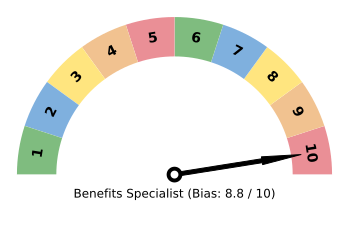

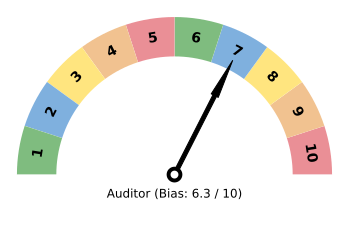

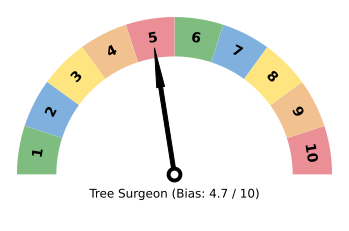

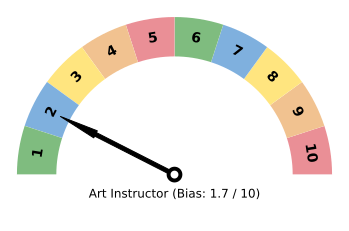

In [96]:
import matplotlib
from matplotlib import cm
from matplotlib import pyplot as plt
from matplotlib.patches import Circle, Wedge, Rectangle

def degree_range(n): 
    start = np.linspace(0,180,n+1, endpoint=True)[0:-1]
    end = np.linspace(0,180,n+1, endpoint=True)[1::]
    mid_points = start + ((end-start)/2.)
    return np.c_[start, end], mid_points
def rot_text(ang): 
    rotation = np.degrees(np.radians(ang) * np.pi / np.pi - np.radians(90))
    return rotation

def gauge(labels=['LOW','MEDIUM','HIGH','VERY HIGH','EXTREME'], \
          colors='jet_r', arrow=1, title='', fname=False): 
    
    """
    some sanity checks first
    
    """
    
    N = len(labels)
    
    if arrow > N: 
        raise Exception("\n\nThe category ({}) is greated than \
        the length\nof the labels ({})".format(arrow, N))
 
    
    """
    if colors is a string, we assume it's a matplotlib colormap
    and we discretize in N discrete colors 
    """
    
    if isinstance(colors, str):
        cmap = cm.get_cmap(colors, N)
        cmap = cmap(np.arange(N))
        colors = cmap[::-1,:].tolist()
    if isinstance(colors, list): 
        if len(colors) == N:
            colors = colors[::-1]
        else: 
            raise Exception("\n\nnumber of colors {} not equal \
            to number of categories{}\n".format(len(colors), N))

    """
    begins the plotting
    """
    
    fig, ax = plt.subplots()

    ang_range, mid_points = degree_range(N)

    labels = labels[::-1]
    
    """
    plots the sectors and the arcs
    """
    patches = []
    for ang, c in zip(ang_range, colors): 
        # sectors
        patches.append(Wedge((0.,0.), .4, *ang, facecolor='w', lw=2))
        # arcs
        patches.append(Wedge((0.,0.), .4, *ang, width=0.10, facecolor=c, lw=2, alpha=0.5))
    
    [ax.add_patch(p) for p in patches]

    
    """
    set the labels (e.g. 'LOW','MEDIUM',...)
    """

    for mid, lab in zip(mid_points, labels): 

        ax.text(0.35 * np.cos(np.radians(mid)), 0.35 * np.sin(np.radians(mid)), lab, \
            horizontalalignment='center', verticalalignment='center', fontsize=14, \
            fontweight='bold', rotation = rot_text(mid))

    """
    set the bottom banner and the title
    """
    r = Rectangle((-0.4,-0.1),0.8,0.1, facecolor='w', lw=2)
    ax.add_patch(r)
    
    ax.text(0, -0.05, title, horizontalalignment='center', \
         verticalalignment='center', fontsize=12)

    """
    plots the arrow now
    """
    
    pos = mid_points[abs(arrow - N)]
    
    ax.arrow(0, 0, 0.225 * np.cos(np.radians(pos)), 0.225 * np.sin(np.radians(pos)), \
                 width=0.01, head_width=0.02, head_length=0.1, fc='k', ec='k')
    
    ax.add_patch(Circle((0, 0), radius=0.02, facecolor='k'))
    ax.add_patch(Circle((0, 0), radius=0.01, facecolor='w', zorder=11))

    """
    removes frame and ticks, and makes axis equal and tight
    """
    
    ax.set_frame_on(False)
    ax.axes.set_xticks([])
    ax.axes.set_yticks([])
    ax.axis('equal')

cols = ['#007A00','#0063BF','#FFCC00','#e58722','#d6202f', '#007A00','#0063BF','#FFCC00','#e58722','#d6202f']
labels = ['1','2','3','4','5', '6','7', '8','9','10']

gauge(labels=labels, colors=cols, arrow=10, title='Benefits Specialist (Bias: 8.8 / 10)')
gauge(labels=labels, colors=cols, arrow=7, title='Auditor (Bias: 6.3 / 10)')
gauge(labels=labels, colors=cols, arrow=5, title='Tree Surgeon (Bias: 4.7 / 10)')
gauge(labels=labels, colors=cols, arrow=2, title='Art Instructor (Bias: 1.7 / 10)')

###**5. A Design Experiment for Validation**

####**5.1 Analogy from Econometric Theory**
To design the validation experiment, we need to consider one analogy from the econometric theory. A typical problem statement among the economists is to identify the consumer demand function This function suggests, how the consumer's willingness to pay for something changes as the market prices of goods or prices changes. Economists model the consumer preferences using a utility function. Here is a very simple example, it is not real world at all but it delivers some nice intuitive results:

Suppose we are looking at a market populated by z individuals.
Each individual i in this market buys either 0 or 1 unit of some good produced by one or several firms
Each individual has a parameter Bi that measures perceived quality of the produced good (think of it as measuring the joy associated with consuming the good)
Let P be the price of goods in the market.
Consumer utility from consuming the good is defined simplistically as: Ui = Bi - P
Individual i will buy the good if and only if Ui > 0 i.e. if Bi > P
In simple terms, if individual's preference parameter has higher value than the price of the good then individual will buy the goods else they will not.

Source : Advanced Industrial Organization: Identification of Demand Functions by Mans Soderbom, University of Gothenburg

####**5.2 Using the Analogy to Design a Validation Experiment**
Let's generate a scenario on the similar grounds using this analogy for the City of Los Angeles jobs and the applicants.

Consider a job market populated by z job applicants.
Each job applicant i in this market applies to a job either 0 or 1 in City of LA's job roles (assume they are qualified).
Each job applicant has a parameter Bi that measures how much is their "willingness to apply" if they realize their is some level of bias in the bulletin.
Let P be the measure of unconscious bias present in job bulletins of City of LA's jobs.
Applicant utility for applying to a particular job is defined simplistically as: Ui = Bi - P
Applicant i will apply to the job if and only if Ui > 0 i.e. if Bi > P
In simple terms, if applicant's "willingness to apply" parameter has higher value than the unconscious bias in the bulletin then applicant will apply else they will not.

**Generating the Applicant's Data**
Let's create a simulation, in which we simulate applicant's (id, gender, willingness to apply), and job roles with simulated unconscious bias score. Let's observe the applicant's response.

In [97]:
def simulate_applicants_data():
    applicant_rows = []
    for i in range(1, 1000):
        gender = random.choice(genders)
        if gender == 'Male':
            wta = random.randint(4, 10)
        else:
            wta = random.randint(2, 7)
        applicant_row = {"id" : "A"+str(i), "gender" : gender, "willingness_to_apply" : wta}
        applicant_rows.append(applicant_row)
    return pd.DataFrame(applicant_rows)

applicants_df = simulate_applicants_data()
applicants_df[['id', 'gender', 'willingness_to_apply']].head()

,id,gender,willingness_to_apply
0,A1,Male,7
1,A2,Male,5
2,A3,Female,5
3,A4,Male,6
4,A5,Male,4


####**5.3 Creating Scenarios and Analysis**
Now, let's simulate two scenarios. First in which there are job bulletins which consists of high unconscious bias. Second same scenario but it contains 40% less unconcsiouc bias as compared to first. For both the scenarios, there are same set of applicants have a particular gender and a fixed willingness_to_apply score.

Scenario 1 : Job Bulletins consists of high unconscious bias

Scenario 2 : Job Bulletins consists of 40% less unconscious bias

In [98]:
bulletins_df = gender_df[['title', 'unconscious_bias']]
bulletins_df = bulletins_df[bulletins_df['title'] != ""]
bulletins_df = bulletins_df.sample(frac=1)
bulletins_df = gender_df[['title', 'unconscious_bias']]
selected_titles = bulletins_df['title'].head(10).values

s1 = []
for title in selected_titles:
    if title.strip() != "":
        bias = bulletins_df[bulletins_df['title'] == title]['unconscious_bias'].iloc(0)[0]
        doc = dict(applicants_df[applicants_df['willingness_to_apply'] > bias]['gender'].value_counts())
        doc["title"] = title
        s1.append(doc)
    
s2 = []
bulletins_df = gender_df[['title', 'unconscious_bias']]
for title in selected_titles:
    if title.strip() != "":
        bias = bulletins_df[bulletins_df['title'] == title]['unconscious_bias'].iloc(0)[0]
        bias = bias - 0.40*bias
        doc = dict(applicants_df[applicants_df['willingness_to_apply'] > bias]['gender'].value_counts())
        doc["title"] = title
        s2.append(doc)

Analysis - Which Scenario garnered more applicants, and more diversity

####**5.4 Applicant's response to Unconscious Bias Bulletins**

In [99]:
x1 = [_['title'] for _ in s1]
y1 = [_['Male']+_['Female'] for _ in s1]

x2 = [_['title'] for _ in s2]
y2 = [_['Male']+_['Female'] for _ in s2]

trace1 = go.Bar(x=y1, y=x1, width=0.3, 
    marker=dict(color='#ef708c', line=dict(
            color='#ef708c',
            width=1.5,
        )), orientation='h', name='Scenario 1: More Unconscious Bias')

trace2 = go.Bar(x=y2, y=x1, width=0.3, 
    marker=dict(color='#42f4b3', line=dict(
            color='#42f4b3',
            width=1.5,
        )),
    orientation='h', name='Scenario 2: Less Unconscious Bias')

layout = dict(
    showlegend = True,
    title='Simulating Number of Applicants who will apply',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
    ),
    xaxis=dict(
        title = "Number of Applicants",
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=False,
        range = (0,1000)
    ),
    barmode='group',
    margin=dict( l=250, r=20, t=50, b=50),
    height=600, width=900,
)

fig = go.Figure(data = [trace2, trace1], layout = layout)
iplot(fig)

In general, we observed that scenario 2 (bulletins with less unconscious bias) garnered more number of applicants for almost every role.

####**5.5 Effect on Male Applicants**
Let's look at if reducing the bias from bulletins attracted more number of male applicants.

In [100]:
x1 = [_['title'] for _ in s1]
y1 = [_['Male'] for _ in s1]

x2 = [_['title'] for _ in s2]
y2 = [_['Male'] for _ in s2]

trace1 = go.Bar(x=y1, y=x1, width=0.3, 
    marker=dict(color='#ef708c', line=dict(
            color='#ef708c',
            width=1.5,
        )), orientation='h', name='Scenario 1: More Unconscious Bias')

trace2 = go.Bar(x=y2, y=x1, width=0.3, 
    marker=dict(color='#42f4b3', line=dict(
            color='#42f4b3',
            width=1.5,
        )),
    orientation='h', name='Scenario 2: Less Unconscious Bias')

layout = dict(
    showlegend = True,
    title='Effect on Male Applicants',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
    ),
    xaxis=dict(
        title = "Number of Applicants",
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=False,
        range = (0,1000)
    ),
    barmode='group',
    margin=dict( l=250, r=20, t=50, b=50),
    height=600, width=900,
)

fig = go.Figure(data = [trace2, trace1], layout = layout)
iplot(fig)

We observe that, there are no significant difference in two scenarios. We observed that most of the job bulletins were masculine and tend to garner more males than women. It will be interesting to check the effect on female applicants.

####**5.6 Does reducing the bias attracted more Female Applicants**
Let's look at the effect on female applicants.

In [101]:
x1 = [_['title'] for _ in s1]
y1 = [_['Female'] for _ in s1]

x2 = [_['title'] for _ in s2]
y2 = [_['Female'] for _ in s2]

trace1 = go.Bar(x=y1, y=x1, width=0.3, 
    marker=dict(color='#ef708c', line=dict(
            color='#ef708c',
            width=1.5,
        )), orientation='h', name='Scenario 1: More Unconscious Bias')

trace2 = go.Bar(x=y2, y=x1, width=0.3, 
    marker=dict(color='#42f4b3', line=dict(
            color='#42f4b3',
            width=1.5,
        )),
    orientation='h', name='Scenario 2: Less Unconscious Bias')

layout = dict(
    showlegend = True,
    title='Effect (Increase) in Female Applicants',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
    ),
    xaxis=dict(
        title = "Number of Applicants",
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=False,
        range = (0,1000)
    ),
    barmode='group',
    margin=dict( l=250, r=20, t=50, b=50),
    height=600, width=900,
)

fig = go.Figure(data = [trace2, trace1], layout = layout)
iplot(fig)

Clearly, number of female applicants who can potentially apply to job bulletins increased in the second scenario in which unconscious bias was reduced by 40 %.

**Experiment Summary**

Every applicant has a parameter called willingness to apply (similar to willingness to pay in economics), We used this parameter in a simulated job market with different roles.

Two scenarios were created: One with normal job bulletins, other with 40% less unconcscious bias.

This experiment suggest that if there is less unconscious bias in job bulletins, then number of applicant's increases to particular job roles.

More female applicants are likely to apply to job roles with less unconscious bias than males, thus there is a direct impact on applicant's diversity

###**6. Recommendation Summary**
Recommendation 1: Gendered-Neutral Text
The analysis in this kernel suggest that about 70% of of the job bulletins have "moderately masculine" nature. We also observed that it is mainly because of high use of keywords which are associated with masculine stereotypes. On an average, masculine keywords are used 3 times as compared to feminine keywords. Thus, The first recommendation is related to word choice. City should encorage use of more gendered neutral language. Masculine keywords such as lead, independent, skill, determined, considered, competant, power, force, and support can be avoided. Instead, keywords with similar meanings can be used. City should encourage more use of feminine keywords for example - understanding, life, community, responsible, support etc. Though these keywords may just sound very normal english keywords but research shows that particular genders tend to associate these keywords to a particular category. Hence, it is the duty of job bulletin writers to carefully select the words to be used. In this kernel, I have shared a list of keywords belonging to both the categories, the bulletin writers can refer to those lists and consider using alternate similar meaning keywords. This will have a higher impact on encouraging diversity.

Recommendation 2: Focus on Bulletins independently
Start removing unconscious bias in a step by step manner. The analysis suggest that some jobs have very high levels of unconscious bias, for example - Database Architect, City Planner, and many IT or technical related jobs. City should target these classes independently and start replacing the keywords which show gender bias. On a normalized scale, different classes had different unconscious bias score ranging from as low as 1 to as high as 60. On an average, 683 job bulletins had the average bias score of 16.3 which is still on a higher side. By targeting the classes which are extereme outliers such as the ones related to technology, finance, benefits, urban industry etc.

Recommendation 3: Minimising the use of Adjectives / Superlatives
Analysis also suggest that many bulletins have high usage of superlatives. Most common ones were master, expert, professional, specialist. Excessive use of superlatives can turn off female candidates who are more collaborative than competitive in nature. Research also shows that women are less likely than men to brag about their accomplishments. In addition, superlatives related to a candidate’s background can limit the pool of female applicants. Hence it is recommended to minimize use of such keywords. Section 3.2 shows the bulletins which uses master and expert many times. Consider replacing such keywords with gender-neutral adjectives, such as excellent or exceptional. Not only such keywords are gender-neutral but also they are associated with a positive sentiment.

Recommendation 4: Replacing keywords containing "man"
A quote that I obtained from Ongig website - Gender-biased titles/language start at a very early age. BYU English professor Delys Snyder says: “When children hear a job title that has a…m-a-n ending, and you ask them to draw pictures or talk about who’s doing that job, they will pick the one that matches the gender of the word.” Hence, it is good to avoid the keywords that contain "man" because it may give an indirect associatation with the male gender. The analysis done in section 3.4 suggest that there are atleast 5 job classes which still uses keywords containing man. Either these keywords can be replaced or not used at all.

Recommendation 5: Do not assume that there are only two genders
One good point about City of LA's job bulletin was that there is no use of gendered pronouns such as he, him, himself, his, her, herself, and she. However, atleast two job bulletins still uses the keyword "he/she". It is important to understand that many people do not want to specify their gender or consider that they do not belong to either of the two genders. Instead of using "he/she", try to use "the applicant" or "they"

Recommendation 6: Reduce the overall length of requirements portion
Asking for too much (with unnecessary requirements) can chase away female applicants. One study reported that men apply for positions if they meet 60% of the qualifications, whereas women only apply if they meet 100% of them. Consider only including the necessary qualifications to do the job to encourage applications from both men and women. Ofcourse, in the next stages of the hiring, one can dig little deeper. Make the requirement section clear and crisp, ensure that it is bulleted, and if possible try to minimize the requirement. Not more than four lines should be used to describe the requirement text. It is also good to specify good to have and must have separately.

##**Part 3: Impact of Content, Tone, and Language : CTL Analysis for CoLA**

The aim of this kernel is to provide an analysis framework which performs various types of text analysis on the job bulletins of City of Los Angeles. The goal of all types of analysis is to measure how well the job descriptions are written. The hypothesis is if the text is well written and fully serves its purpose, then it is likely to attract a good quality and quantity of applicants. To validate the hypothesis, I have also created a benchmark index using an indirect method, which can be used to compare CoLA insights with the market insights

Table of Contents

1. Why Content, Tone, Format and Language Matters?

2. Creating a Benchmark Index for Hypothesis Validation

    2.1 Analogy of using a Market Benchmark

    2.2 Analysis of Job Bulletins of Fortune 500 Companies

3. Content: Is the Content of CoLA Job Descriptions Optimal?

    3.1 Are the Job Descriptions of City of LA too Lengthy?

    3.2 Are the Job Descriptions of City of LA too Wordy?

    3.3 Are the Job Bulletins difficult to read ?

    3.4 What does the Readability analysis of Bulletins suggest?

    3.5 Which Job Bulletins are too wordy?

    3.6 What are the outlier Job Bulletins - least wordy

    3.7 Outlier Job Bulletins - easier to read

    3.8 Relatively, which Job Bulletins are difficult to read

4. Language: Is the Language of CoLA Job Descriptions Optimal?

    4.1 How well the Job Bulletins describes Duties?

    4.2 Does the Word Choice convey a lot of strictness?

5. Is the format optimal?

6. Tone: What does the Tone and Sentiment of CoLA Job Descriptions suggest?

7. Key Recommendations

###***Set data path***

In [102]:
base_path = "/content/drive/My Drive/Colab Notebooks/RSS_organised/BiasManagement/cityofla/CityofLA/Job Bulletins/"
ext_path = "/content/drive/My Drive/Colab Notebooks/RSS_organised/BiasManagement/cityofla/cityofla-external/"
structured_path = "/content/drive/My Drive/Colab Notebooks/RSS_organised/BiasManagement/cityofla/structured_file.csv" # The file is from the last part (Part1 section 3)





###**1. Why Content, Tone, Language and Layout Matters ?**
A number of studies (LinkedIn, Forbes, and Glassdoor) have suggested that both the quality and the quantity of applicant's pool can be significantly influenced by how a job description is written.

"A well-written, complete, and insightful job description can result in attracting some of the top and diverse talents for the role". On the other hand, a description which lacks key features (example - an optimal word limit, choice of the words, language used, overall tone) may result in attracting fewer candidates. It is important for City of Los Angeles to share the job descriptions with optimal and satisfactory content, language, tone, and the layout.

The job descriptions are meant to effectively communicate about a particular job class, duties, responsibilities, requirements, and company to the audience. The point worth noting is that, the audience may have versatile backgrounds, demographics, different thought processes, intelligence, intellectuals, and different skills. With such diversity possible in applicants, it become important for the company to make sure that job descriptions are generic and not focussed to target a particular group.

Content: Content plays the most important role in describing the overall quality of a job description. Use of too many words, long paragraphs, and irrelevant verbose may not be perceived equally by all candidates, Especially women who according to Harvard Business Review, tend to get 100% clarity about the job before applying. Another example from Linkedin study was related to length of job descriptions, Shorter job posts garnered a higher application rate than longer ones. Thus, keeping the job description text concise and optimal helps candidates immediately get the info they need.

Tone: For any big company it is important to express a professional tone in the job descriptions. An ideal text should be written in a formal tone and should reflect company's actual culture. The overall tone can be formal, generic or casual tones. Moreover, Use of particular wordings or phrases can also communicate emotional tones, which can have a direct impact on the applicant pool. For instance, more use of words with negative sentiment may reflect a pessimistic tone and may give a bad impression. It may result in only a fraction of potential applicants will apply.

Language: Choice of words and phrases is another important factor that makes up a good job description. Langauge analysis is about evaluating if the text conveys the proper message it is meant to be. One key example is about job duties which are meant to convey what the person will be doing if they are hired. It is possible that langauge or text of job duties section may not properly convey all those actions.

###**2. Creating A Benchmark Index for Hypothesis Validation** 
The problem statement of this challenge is very open ended and without actual applicant's response data, one cannot validate if all the intution and hypothesis are correct or not. Though I have used a number of other studies and researches conducted by many other companies as the reference to suggest key hypothesis but it is also important to develop a high level validation strategy.

####**2.1 Analogy of using a Market Benchmark Index**
Analogy: In stock markets, investors refer to S&P 500 index which is an aggreagted stock index based on the market capitalizations of 500 large companies having common stock listed on the NYSE, NASDAQ, or the Cboe BZX Exchange. Investors use this index to understand how the overall market is performing and if their stock is also aligned (or below, or above) with it. Hence, it serve as a benchmark index.
In the similar manner, I created my own benchmark index by analysing the Job Descriptions of Fortune 500 Companies (Forbes: Fortune 500 companies). Use of this index, gives us a "Industry" benchmark (similar to "market" in S&P 500). Ofcourse, this index may not convey an exact reflection of metrics but this index definately gives the most ideal metrics which are used by some of the top and big companies having diverse sectors.
To state an example, it will be interesting to compare what is the average number of words used in City of Los Angeles job descriptions and that of Fortune 500 companies descriptions.
The following diagram explains how I developed this index




I obtained the list of 2019 fortune 500 companies from Forbes. I made different input queries (location="la", role="CityofLA Job Roles", company="One of the 500 companies") and queried them in Free Public API of Indeed to obtain the job bulletins of these 500 companies. I obtained maximum three job descriptions per company, obtained the text data, and calculated all the relevant metrics to be used as a benchmark. The script of this process is shared in the next cell. The code is commented, it requires two arguments - API_KEY (which can be obtained from this link - https://opensource.indeedeng.io/api-documentation/) and a list of job roles to be searched.

Adding this benchmark comparison gives a data-driven perspective to this problem along with our hypothesis.

Notice (by YAN): This is to get a benchmark data for comparision, the file of fortune_500_jds.csv has beed uploaded to the dataset folder.

####**2.2 Fortune 500 Companies: Job Bulletins Analysis**
In the next cell, I have analysed all the relevant metrics related to this kernel for the job bulletins of fortune 500 companies. The output of this analysis is the benchmark index.

In [103]:
# Part 2 has already installed textsta, install textstat if you just start from part 3. 
!pip install textstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [104]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools
init_notebook_mode(connected=True)

from nltk.corpus import stopwords 
from nltk.util import ngrams
import textstat, spacy, nltk 
import pandas as pd, os
import string, re
import json

import nltk
nltk.download('stopwords')

structured_df = pd.read_csv(structured_path)
stopwords = stopwords.words('english')
nlp = spacy.load('en_core_web_sm')

""" function to cleanup the text """
def _cleanup(text):
    text = text.lower()
    text = " ".join([c for c in text.split() if c not in stopwords])
    for c in string.punctuation:
        text = text.replace(c, " ")
    text = " ".join([c for c in text.split() if c not in stopwords])

    words = []
    ignorewords = []
    for wrd in text.split():
        if len(wrd) <= 2: 
            continue
        if wrd in ignorewords:
            continue
        words.append(wrd)
    text = " ".join(words)    
    return text

## read the job descriptions of fortune 500 companies 
fort_df = pd.read_csv(ext_path + "fortune_500_jds.csv")
fort_df['clean_text'] = fort_df['desc'].apply(lambda x : _cleanup(x))

## meta features
fort_df['lexicon_count'] = fort_df['desc'].apply(lambda x : textstat.lexicon_count(x))
fort_df['sentence_count'] = fort_df['desc'].apply(lambda x : textstat.sentence_count(x))
fort_df['avg_sentence_length'] = fort_df['desc'].apply(lambda x : textstat.avg_sentence_length(x))

## readability 
fort_df['avg_syllables_per_word'] = fort_df['desc'].apply(lambda x : textstat.avg_syllables_per_word(x))
fort_df['avg_character_per_word'] = fort_df['desc'].apply(lambda x : textstat.avg_character_per_word(x))
fort_df['polysyllabcount'] = fort_df['desc'].apply(lambda x : textstat.polysyllabcount(x))
fort_df['smog_index'] = fort_df['desc'].apply(lambda x : textstat.smog_index(x))
fort_df['automated_readability_index'] = fort_df['desc'].apply(lambda x : textstat.automated_readability_index(x))
fort_df['syllable_count'] = fort_df['desc'].apply(lambda x : textstat.syllable_count(x))
fort_df['dale_chall_readability_score'] = fort_df['desc'].apply(lambda x : textstat.dale_chall_readability_score(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


###**3. Is the Content of CoLA Job Descriptions Optimal?**
Content defines the overall structure of the bulletin. It involves the characteristics of words, phrases, sentences, and paragraphs. Key characteristics are:

Meta Statistics of text-objects: This consists of simple statistical values such as - Total Number of words, Total Number of sentences, Average length of the sentences

Readability of words and document: This involves the analysis of text object and identifying if the text is highly or poorly readable. This also consists of total number of difficult words used (words having more than three sounds - polysyllables), and an aggregated readability score of the text.

The hypothesis is that the job descritions that should be easily perceived by everyone should have shorter lengths (words, sentences). The use of easy words should garner more responses as they must be grasped by a diverse set of people.

In [105]:
results = []
for fname in os.listdir(base_path):
    if fname == "POLICE COMMANDER 2251 092917.txt":
        continue

    txt = open(base_path + fname).read()
    lines = txt.split("\n")
    txt = " ".join(txt.split("\n"))
    
    file_df = structured_df[structured_df["FILE_NAME"] == fname]
    if len(file_df) > 0:
        title = file_df['JOB_CLASS_TITLE'].iloc(0)[0]
        duties = file_df['JOB_DUTIES'].iloc(0)[0]
    else:
        title = ""
        
    start = 0
    rel_lines = []
    for i, l in enumerate(lines):
        if 'requirement' in l.lower():
            start = i
            break
    for i, l in enumerate(lines[start+1:]):
        if l.isupper():
            break
        rel_lines.append(l)
    req = "\n".join(rel_lines)
    
    
    doc = {
        "title" : title,
        'filename' : fname,
        'text' : txt,
        'req' : req,
        'duties' : duties
    }
    results.append(doc)
    
raw_df = pd.DataFrame(results)

## meta features
raw_df['lexicon_count'] = raw_df['text'].apply(lambda x : textstat.lexicon_count(x))
raw_df['sentence_count'] = raw_df['text'].apply(lambda x : textstat.sentence_count(x))
raw_df['avg_sentence_length'] = raw_df['text'].apply(lambda x : textstat.avg_sentence_length(x))
raw_df['avg_syllables_per_word'] = raw_df['text'].apply(lambda x : textstat.avg_syllables_per_word(x))

raw_df['avg_syllables_per_word'] = raw_df['text'].apply(lambda x : textstat.avg_syllables_per_word(x))
raw_df['avg_character_per_word'] = raw_df['text'].apply(lambda x : textstat.avg_character_per_word(x))
raw_df['polysyllabcount'] = raw_df['text'].apply(lambda x : textstat.polysyllabcount(x))
raw_df['syllable_count'] = raw_df['text'].apply(lambda x : textstat.syllable_count(x))

raw_df['smog_index'] = raw_df['text'].apply(lambda x : textstat.smog_index(x))
raw_df['automated_readability_index'] = raw_df['text'].apply(lambda x : textstat.automated_readability_index(x))
raw_df['dale_chall_readability_score'] = raw_df['text'].apply(lambda x : textstat.dale_chall_readability_score(x))

####**3.1 Are the Job Descriptions of City of LA too Lengthy?**

In [106]:
import numpy as np
import plotly.figure_factory as ff

# without this the figures cannot be shown in colab
import plotly.io as pio
pio.renderers.default = 'colab'

colors = ['#333F44', '#37AA9C']
hist_data = [fort_df['sentence_count'], raw_df['sentence_count']]
group_labels = ['Fortune 500 Companies (Benchmark)', 'City of Los Angeles']
fig = ff.create_distplot(hist_data, group_labels, colors=colors, bin_size=2)
fig['layout'].update(title='Bulletins Length (Number of Sentences)', 
                     legend = dict(orientation="h", x = 0.1, y = 1.09))
iplot(fig, filename='Distplot with Multiple Datasets')

At an overall level, bulletin lengths (total number of sentences) for City of LA is skewed on the higher side. A large number of job bulletins have more than 30 total sentences in all the sections (duties, requirements, process, notes, selection etc.).
In comparison to Fortune 500 companies, their bulletin lengths is skewed on a much lower side.
The average number of sentences used in the job bulletins of fortune 500 companies is equal to 18 sentences while it is equal to 32 sentences for City of LA.

####**3.2 Are the Job Descriptions of City of LA too Wordy?**

In [107]:
hist_data = [fort_df['lexicon_count'], raw_df['lexicon_count']]
group_labels = ['Fortune 500 Companies (Benchmark)', 'City of Los Angeles']
fig = ff.create_distplot(hist_data, group_labels, colors=colors, bin_size=12)
fig['layout'].update(title='Bulletins Length (Number of Words)', 
                     legend = dict(orientation="h", x = 0.1, y = 1.09))
iplot(fig, filename='Distplot with Multiple Datasets')

On an average, City of LA bulletins contain about 1352 words while fortune 500 companies bulletins contain only about 508, which is even lesser than half of what City of LA uses.
Very few City of LA bulletins contain less than 1000 words. Most of the bulletins are two page descriptions, there is a possiblity to cut down the noisy text which is irrelevant to the purpose.

####**3.3 Are the Job Bulletins difficult to read ?**
In this section, the main focus is on evaluating the readability of job bulletins text. First let's focus on identifying the words which are difficult to read for all audience. For this purpose I am using my own readability calculation package.

Link of my readability package - https://github.com/shivam5992/textstat

Every word is made up of multiple sounds which are called syllables. A word containing fewer number of syllables (sounds) is considered an easy word, while a word containing more than three syllables (sounds) are considered as difficult words. For example -

In [108]:
hist_data = [raw_df['polysyllabcount'], fort_df['polysyllabcount']]
group_labels = ['City of Los Angeles', 'Fortune 500 Companies']

fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist=False, bin_size=1)
fig['layout'].update(title='Number of Difficult Words (3+ sounds) used',
                     legend = dict(orientation="h", x = 0.1, y = 1.09))
iplot(fig, filename='Distplot with Multiple Datasets')

Their is a high useage of words having more than three sounds in the City of Los Angeles job bulletins, on an average every job description contain about 345 such keywords.
In comparison to benchmark, only about 135 keywords are used in every job bulletins.

####**3.4 Readability score of Bulletins**
I used the Dale Chall Readability score formula and the implementation from my own python package to calculate an overall readability score of job bulletins. Higher the score means higher readability of the text.

The Dale Chall Readability score formula is inspired by Flesch–Kincaid readability test which used word-length to determine how difficult a word was for readers to understand. DCR formula uses a list of 3000 very easy or basic words.

In [109]:
fort_df['dale_chall_readability_score'] = fort_df['dale_chall_readability_score'].apply(lambda x : 15 if x >= 15 else x)
hist_data = [raw_df['dale_chall_readability_score'], fort_df['dale_chall_readability_score']]
group_labels = ['City of Los Angeles', 'Fortune 500 Companies']

fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist=False, bin_size=0.1)
fig['layout'].update(title='Readability Score of Job Bulletins (Higher the better)',
                     legend = dict(orientation="h", x = 0.1, y = 1.09))
iplot(fig, filename='Distplot with Multiple Datasets')

On a normalized scale ( 0 - 15 ), benchmark companies have slightly higher readability scores in comparison to that of city of los angeles bulletins.

Let's compare all the metrics side by side.

In [110]:
cols = ["lexicon_count", "sentence_count", "avg_sentence_length", "avg_syllables_per_word", 
        "avg_character_per_word", "polysyllabcount", "syllable_count", "dale_chall_readability_score"]
results = []
for c in cols:
    doc = {
        "label" : c.replace("_", " ").title(),
        "Fortune 500" : np.mean(fort_df[c]),
        "City of LA" : np.mean(raw_df[c])        
    }
    results.append(doc)
    
np.mean(raw_df['polysyllabcount']), np.mean(fort_df['polysyllabcount']) 
com_df = pd.DataFrame(results)
com_df[['label', 'Fortune 500', 'City of LA']]

,label,Fortune 500,City of LA
0,Lexicon Count,507.792996,1352.265396
1,Sentence Count,23.136187,57.791789
2,Avg Sentence Length,27.032451,23.503079
3,Avg Syllables Per Word,1.907315,1.858504
4,Avg Character Per Word,6.138864,5.967889
5,Polysyllabcount,134.992996,345.450147
6,Syllable Count,968.315175,2508.296188
7,Dale Chall Readability Score,11.082078,9.170337


####**3.5 Outlier Job Bulletins - too wordy**
Let's look at which roles have most number of the stats that we discussed in previous points.

In [111]:
t = raw_df.sort_values('lexicon_count', ascending = False).head(10)[['title', 'lexicon_count', 'polysyllabcount']]

trace1 = go.Bar(
    y=t['title'][::-1],
    x=t['lexicon_count'][::-1],
    name='Total Words',
    orientation = 'h',
    marker = dict(
        color = '#37AA9C', opacity=0.7,
        line = dict(
            color = '#37AA9C',
            width = 3)
    )
)
trace2 = go.Bar(
    y=t['title'][::-1],
    x=t['polysyllabcount'][::-1],
    name='Difficult Words (High Syllables)',
    orientation = 'h',
    marker = dict(
        color = 'rgba(58, 71, 80, 0.4)',
        line = dict(
            color = 'rgba(58, 71, 80, 0.4)',
            width = 3)
    )
)

data = [trace2, trace1]
layout = go.Layout(
    title = "Job Roles with most number of words (and difficult words)",
    legend = dict(orientation = "h", x = 0.1, y = 1.11),
    barmode='group', margin = dict(l=300), width=800,
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='marker-h-bar')

####**3.6 Outlier Job Bulletins - least wordy** 
Similarly, following plot shows the roles having least number of words.

In [112]:
t = raw_df.sort_values('lexicon_count', ascending = False).tail(10)[['title', 'lexicon_count', 'polysyllabcount']]

trace1 = go.Bar(
    y=t['title'][::-1],
    x=t['lexicon_count'][::-1],
    name='Total Words',
    orientation = 'h',
    marker = dict(
        color = '#f9bd63', opacity=0.7,
        line = dict(
            color = '#f9bd63',
            width = 3)
    )
)
trace2 = go.Bar(
    y=t['title'][::-1],
    x=t['polysyllabcount'][::-1],
    name='Difficult Words (High Syllables)',
    orientation = 'h',
    marker = dict(
        color = 'rgba(58, 71, 80, 0.4)',
        line = dict(
            color = 'rgba(58, 71, 80, 0.4)',
            width = 3)
    )
)

data = [trace2, trace1]
layout = go.Layout(
    title = "Job Roles with least number of words (and difficult words)",
    legend = dict(orientation = "h", x = 0.1, y = 1.11),
    barmode='group', margin = dict(l=300), width=800,
    xaxis=dict(range=(0,2500))
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='marker-h-bar')

####**3.7 Outlier Job Bulletins - easier to read**
Now, let's identify which job roles have high readability scores, ie. they are relatively easier to read as compared to other bulletins.

In [113]:
t = raw_df.sort_values('automated_readability_index', ascending = False).head(10)[['title', 'automated_readability_index', 'syllable_count']]

trace0 = go.Scatter(
    x=t.automated_readability_index[::-1],
    y=t.title[::-1],
    mode='markers',
    name='Automated Readability Index (higher the better)',
    marker=dict(
        color='rgba(156, 165, 196, 0.95)',
        line=dict(
            color='rgba(156, 165, 196, 1.0)',
            width=1,
        ),
        symbol='circle',
        size=22,
    )
)
trace1 = go.Scatter(
    x=t.automated_readability_index,
    y=t.title,
    mode='markers',
    name='Average Syllables (Number of Sounds) per Word',
    marker=dict(
        color='rgba(204, 204, 204, 0.95)',
        line=dict(
            color='rgba(217, 217, 217, 1.0)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)

data = [trace0]
layout = go.Layout(
    title="Bulletins with highest Readability Scores",
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        titlefont=dict(
            color='rgb(204, 204, 204)'
        ),
        tickfont=dict(
            color='rgb(102, 102, 102)',
        ),
        showticklabels=True,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(
        l=400,
        r=40,
        b=50,
        t=80
    ),
    legend=dict(
        font=dict(
            size=10,
        ),
        yanchor='middle',
        xanchor='right',
    ),
    height=600,
    hovermode='closest',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='lowest-oecd-votes-cast')

####**3.8 Outlier Job Bulletins - too difficult to read** 
Next, let's look at which job role bulletins having least readability scores.

In [114]:
raw_df = raw_df[raw_df['title'] != ""]
t = raw_df.sort_values('automated_readability_index', ascending = False).tail(10)[['title', 'automated_readability_index', 'syllable_count']]

trace0 = go.Scatter(
    x=t.automated_readability_index[::-1],
    y=t.title[::-1],
    mode='markers',
    name='Automated Readability Index (lower the bad)',
    marker=dict(
        color='rgba(156, 165, 196, 0.95)',
        line=dict(
            color='rgba(156, 165, 196, 1.0)',
            width=1,
        ),
        symbol='circle',
        size=22,
    )
)
trace1 = go.Scatter(
    x=t.automated_readability_index,
    y=t.title,
    mode='markers',
    name='Average Syllables (Number of Sounds) per Word',
    marker=dict(
        color='rgba(204, 204, 204, 0.95)',
        line=dict(
            color='rgba(217, 217, 217, 1.0)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)

data = [trace0]
layout = go.Layout(
    title="Bulletins with least Readability Scores",
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        titlefont=dict(
            color='rgb(204, 204, 204)'
        ),
        tickfont=dict(
            color='rgb(102, 102, 102)',
        ),
        showticklabels=True,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(
        l=400,
        r=40,
        b=50,
        t=80
    ),
    legend=dict(
        font=dict(
            size=10,
        ),
        yanchor='middle',
        xanchor='right',
    ),
    height=600,
    hovermode='closest',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='lowest-oecd-votes-cast')

###**4. Analysis of Bulletins Language**
In this section, we focus on analysing the language used in the job description of CoLA jobs. Mainly, I have focussed on two points:

Do Duties section really convey the proper message.
Does the Job Descriptions convey a very demanding/strict message?

####**4.1 How well the Job Bulletins describes Duties?**
There is a very specific and and important section in a job bulletin called "Job Duties". The main goal of this section is to effectively communicate what does the employee of the particular job class do. This section describes all the actions or responsibilties to be performed by the employee.

Any duties text which lacks this action describing nature is an example of poorly written text. A poorly written job duties section is likely to have following characteristics:

Very few verbs: this means that the duties section does not effectively describe what does the person will do or need to do in that job class.
High use of nouns: this indicates that duties section talks a lot about entities or facts and less about the actions to be done.
An example of a well written job duties section should have more usage of verbs that describe what does the person do and less usage of nouns. The main hypothesis is that the applicant should be well aware about all the possible responsibilties to be carried out in the job. The applicant should not bother about all the irrelevant or indirect details but should perceive the information about "actions to do".

Let's look at how City of LA uses nouns and verbs in the job duties.

In [115]:
## more action or more verbs | specially in the duties
def _action_entity(txt):
    doc = nlp(txt)
    words = []
    for token in doc:
        words.append(token.lemma_)
    words = " ".join(words)
    doc = nlp(words)

    postags = {}
    for token in doc:
        if token.pos_ not in postags:
            postags[token.pos_] = 0 
        postags[token.pos_] += 1
    return postags

raw_df['pos'] = raw_df['duties'].apply(lambda x : _action_entity(str(x)))
raw_df['verb'] = raw_df['pos'].apply(lambda x : x['VERB'] if 'VERB' in x else 0)
raw_df['noun'] = raw_df['pos'].apply(lambda x : x['NOUN'] if 'NOUN' in x else 0)

hist_data = [raw_df['verb'], raw_df['noun']]
group_labels = ['Verbs usage in Duties Text', 'Nouns Usage in Duties Text']
fig = ff.create_distplot(hist_data, group_labels, colors=['#8fddf7', '#ef8892'], bin_size=1)
fig['layout'].update(title='', 
                     legend = dict(orientation="h", x = 0.1, y = 1.09))
iplot(fig, filename='Distplot with Multiple Datasets')

We can observe that, there is ofcourse higher usage of nouns and less of verbs which is fine. But the bad examples will be the one in which noun to verb ratio is very low. Let's look at such examples in which noun to verb ratio and the use of verbs in the text is low.

Examples of Duties with Less Action Describing Nature

In [116]:
from IPython.core.display import HTML

raw_df['v_n_ratio'] = raw_df['verb'] / raw_df['noun']
t = raw_df.sort_values('v_n_ratio')
t = t[t['v_n_ratio']!=0]
t = t[t['verb'] < 3]

interest = ['does', 'supervises', 'acts', 'works']
html = "<div><hr>"
for i,f in t[1:4].iterrows():
    html += "<h2><font color='red'>Job: " + f['title'] + "</font></h2>"
    doc = nlp(f['duties'])
    for token in doc:
        if token.text in interest:
            html += """<span style='background-color:#f20909; padding:5px'>
                     <font color='#000'>"""+token.text+"""</font></span>"""+" "
        else:
            html += token.text+" "

html += "<hr></div>"
display(HTML(html))

We can observe that these job descriptions talks very less about what the person needs to do. There is a very less usage of verbs in the text. Let's look at some examples of well written job duties text.

Examples of Well Written Job Duties Text

In [117]:
ignore = ['may', 'required', 'be', 'are']
t = raw_df.sort_values('verb', ascending = False)
html = "<div><hr>"
for i,f in t[:3].iterrows():
    html += "<h2><font color='green'>Job: " + f['title'] + "</font></h2>"
    doc = nlp(f['duties'])
    for token in doc:
        if token.text.endswith("d"):
            html += token.text+" "
        elif token.text in ignore:
            html += token.text+" "
        elif token.pos_ == 'VERB':
            html += """<span style='background-color:#86f9c4; padding:5px'>
                     <font color='#000'>"""+token.text+"""</font></span>"""+" "
        else:
            html += token.text+" "

html += "<hr></div>"
display(HTML(html))

In these examples, we can clearly see that use of verbs and specifically those which describes the responsibilites and actions to do is very high. This makes them good examples of well written job duties text.

####**4.2 Does the Word Choice convey a lot of strictness ?**
Another part in the language analysis is measuring if the use of particular words or phrases convey a lot of strictness. A job description should not be very demanding in nature or tone as it may put off some applicants. Consider the applicants which do not qualify 100% for the job but about 70-80% which is still good for the company. However, due to the demanding or strictness conveyed from the job bulletin, those candidates may not apply for such jobs. Hence in order to encourage applications which is directly linked to getting more diverse applications, it is necessary to measure and rectify strictness conveyed due to use of some words.

Let's look at en example in which more number of strict words or phrases is used.

In [118]:
class JD_Purifier():
    def __init__(self):
        self.lookups = {  
                          "strict_words"   : ['disqualified', 'rejected', 'must', 'should' , 'required', 'banned', 'barred', 'disbarred', 'debarred', 'eliminated', 'precluded', 'disentitled', 'ineligible', 'unfit', 'unqualified', 'essential', 'desirable', 'desired'],
                          "strict_phrases" : ['only be', 'who fail', 'not allowed', 'should have', 'must have' , 'subject to', 'will not be considered', 'cannot be appointed', 'who lack'],
                }
        
    ## function to clean a text
    def _cleanup(self, text):
        text = text.lower()
        text = " ".join([c for c in text.split() if c not in stopwords])
        for c in string.punctuation:
            text = text.replace(c, " ")
        text = " ".join([c for c in text.split() if c not in stopwords])

        words = []
        ignorewords = []
        for wrd in text.split():
            if len(wrd) <= 2: 
                continue
            if wrd in ignorewords:
                continue
            words.append(wrd)
        text = " ".join(words)    
        return text
    
    def _check_presence(self, flag, txt, condition):    
        matched = {}
        txt = " "+txt.lower()+" "
        for wrd in self.lookups[flag]:
            if condition == "exact":
                cnt = txt.count(" "+wrd.lower()+" ")
                if cnt > 0:
                    matched[wrd.lower()] = cnt
            elif condition == "startswith":
                cnt = txt.count(" "+wrd.lower())
                if cnt > 0:
                    matched[wrd.lower()] = cnt
        return matched

    def _strictness_bias(self, txt):
        cln = self._cleanup(txt)

        ## word choice
        strict_usage = self._check_presence("strict_words", txt, condition = "exact")

        ## phrase choice
        strict_phrases = self._check_presence("strict_phrases", txt, condition = "exact")

        doc = {
            "strict_wc" : strict_usage,
            "strict_phrases" : strict_phrases,
            "strict_wc_sum" : sum(strict_usage.values()),
            "strict_phrases_sum" : sum(strict_phrases.values())
        }
        return doc

jdp = JD_Purifier()
raw_df['strict_mentions'] = raw_df['text'].apply(lambda x : jdp._strictness_bias(x))
raw_df['strictness'] = raw_df['strict_mentions'].apply(lambda x : x['strict_phrases_sum']+x['strict_wc_sum'])


for i, r in raw_df.sort_values("strictness", ascending = False).head().iterrows():
    d = r['strict_mentions']['strict_wc'] 
    d.update(r['strict_mentions']['strict_phrases'])
    htm = (r['text'].split("  4. ")[1].split("  5. ")[0])
    title = r['title']
    break
    
html = "<div><hr>"
html += "<h2><font color='#37AA9C'>Job: " + title + "</font></h2>"

wl1 = ['disqualified', 'rejected', 'must', 'should' , 'required', 'banned', 'barred', 'disbarred', 'debarred', 'eliminated', 'precluded', 'disentitled', 'ineligible', 'unfit', 'unqualified', 'essential', 'desirable', 'desired']
wl2 = ['will not be processed', 'only be', 'who fail', 'not allowed', 'should have', 'must have' , 'subject to', 'will not be considered', 'cannot be appointed', 'who lack']
interest = wl1 + wl2

for w in interest:
    if w in htm.lower():
        if len(w.split()) > 1:
            htm = htm.replace(w, """<span style='background-color:#f20909; padding:5px'>
                     <font color='#000'>"""+w+"""</font></span>""")
        else:
            htm = htm.replace(w, """<span style='background-color:#f78f8f; padding:5px'>
                     <font color='#000'>"""+w+"""</font></span>""")
html += "<p style='text-align:justify'>" + htm + "</p>"
html += "<hr></div>"
display(HTML(html))

IndexError: ignored

Excessive use of phrases like "who fail", "will not be considered", "must have" etc gives an impression that job class is very demanding. Instead of using such phrases, one can use keywords like good to have, it will be an add-on. This is much nicer and gives an optimistic tone from the text. Thus, may encourage many more to apply.

In [ ]:
import operator 
faculties = raw_df.sort_values("strictness", ascending = False).head(4)['title'].values

traces, titles = [], []
for title in faculties:
    fac_df = raw_df[raw_df['title'] == title]
    
    r = fac_df.iloc(0)[0]
    d = r['strict_mentions']['strict_wc'] 
    d.update(r['strict_mentions']['strict_phrases'])
    
    d1 = sorted(d.items(), key=operator.itemgetter(1))
    
    xx, yy = [_[0] for _ in d1], [_[1] for _ in d1]
    tracei = go.Bar(y=xx, x=yy, name="", orientation="h", marker=dict(color='green'), opacity=0.8)
    traces.append(tracei)
    titles.append(title)
    
k = 0
fig = tools.make_subplots(rows=2, cols=2, subplot_titles=titles, print_grid=False)
for i in range(1,3):
    for j in range(1,3):
        fig.append_trace(traces[k], i, j)
        k += 1

fig['layout'].update(height=800, 
                     title='Use of strict phrases', 
                     showlegend=False,
                     margin=dict(l=200))
for i in fig['layout']['annotations']:
    i['font'] = dict(size=8, color='green')

iplot(fig, filename='grouped-bar')

these words / phrases are some of the top phrases used in City of LA texts and can by replaced with much more friendly keywords.

###**5. Is the format optimal ?**
One of the key point I noticed that generally City's job bulletin's requirements have about 3 lines talking about job descriptions. The lines end with one of "or" /"and" which indicates that only one of the requirement set needs to be fulfilled. However, the use of "or" towards the very end is not immediately visible to the applicants and gives the first impression that the particular job class requires 3 different requirements. But in reality, they are only asking for 1.

A simple solution for this issue is suggested in the following figure. Just by making a slight change, requirements can become more clear and explict.

###**6. What is the overall Tone / Sentiment of CoLA Job Bulletins**
Similar to strictness tone discussed in section 4.1, it is also necessary that overall sentiment of the job bulletins should not be too negative. Use of sentences and words that convey moderate or high negative sentiments should be avoided. I used python's textblob library to caluclate the sentiment of every text in each of the document.

Let's look at some examples of sentence with high negative sentences which can be avoided.

In [ ]:
from textblob import TextBlob
import nltk
nltk.download('punkt')

some_negatives = []
other_negatives = []
for i,r in raw_df.iterrows():
    blob = TextBlob(r['text'].lower())
    for sent in blob.sentences:
        senti = sent.sentiment.polarity
        if senti < -0.2:
            if " who fail to " in sent.lower():
                some_negatives.append(str(sent))
            else:
                other_negatives.append(str(sent))

ends = []
for x in other_negatives:
    if any(_ in x for _ in ['poor', 'unsafe']):
        if x not in ends:
            ends.append(x)

negs = ['unsafe', 'failed', 'disqualified', 'poor', 'affect']
html = "<div><hr>"
for l in ends[:2]:
    l = " ".join(["<span style='background-color:#f76276; padding:3px'>"+w+"</span>" if w in negs else w for w in l.split()])
    html += "<b>Sentence:</b> "+l
    html += "<br><br>"
html += "<hr></div>"
display(HTML(html))

And then there are examples of very generic sentences which convey a pessimistic tone. For example, one particular pattern repeats in most of the bulletins:

candidates who fail to _ will not be considered __ will not be processed

In [ ]:
interest1 = ['who fail to']
interest2 = ['will not be considered', 'disqualified', 'will not be processed']
html = "<div><hr>"
for l in some_negatives[:4]:
    for phrase in interest1:
        l = l.replace(phrase, """<span style='background-color:#f76276; padding:3px'>
                     <font color='#000'>"""+phrase+"""</font></span>""")
    for phrase in interest2:
        l = l.replace(phrase, """<span style='background-color:#fc6267; padding:3px'>
                     <font color='#000'>"""+phrase+"""</font></span>""")
    html += "&bull; "+l
    html += "<br><br>"
html += "<hr></div>"
display(HTML(html))

This way of writing the text can be avoided and instead one can write, candidates need to __ so that ___ can be considered.

###**7. Key Recommendations**
Recommendation 1: An Optimal Bulletin's Length

The analysis performed in section 3 suggest that lenghts of City of LA's bulletin's is somewhat higher. It is recommended that unnecessary jargon, irrelevant details should be avoided. Bulletins should be made more crisper by cutting down atleast 30-40% of words used. On an average, City should try to use not more than 20 sentences and 700 keywords in the overall description. Additionally, as every career advisor suggest to every job candidate that their resume should be single page, similarl, for an organization, it will be really good to cut down the bulletin's to single page. This will help the candidates to grasp the information quickly. Reduce the average sentence length as well, number of words in a sentence should be as less possible. This is because the reader should get the main context of the different sections from the relevant information.
Recommendation 2: Easier to Read Job Bulletins

Section 3 analysis also suggest that a large number of the job bulletin's consists of complex keywords. Mainly the words having more number of syllables (or sounds). It is obvious that most of the words cannot be ignored, however increased use of polysyllable (greater than three syllables) keywords reduces the readability of the overall text. Job bulletin's are meant to attract more and a variety of applicant's. To ensure that this happens, it is recommended to increase the use of more easier words and reducing the keywords having more than three sounds.
Recommendation 3: Well Written Job Duties

The analysis performed in section 4 describes that Most of the job bulletin's duties section is not optimally written. An optimal duties section should clearly describe the actions, tasks, responsibilities of the job class. Hence, more use of verbs should be encouraged. Atleast 5 verbs that describe the actions should be used in the duties. Use of more verbs suggest that the duties section is more insightful and less factual. Hence, it makes it easier for the applicants or the readers to quickly get acquainted about the job duties. This will have a direct correlation on increase in number of applicants.
Recommendation 4: An Optimistic Tone of the Bulletin

Bulltein's should not sound pessimistic to the applicants. Minimize the use of keywords which gives a pessimistic or daunting tone. Instead of saying - X is must have, City can say, X is good to have. Also minimize the use of negative keywords such as - disqualified, fail etc. Instead use words which may convey the same message but in a much polite tone.
Recommendation 5: Less Cluttered Requirements Section

Make the requirement section more visible and less cluttered. Since, there is the use of logical operators (and, or) in the requirement pointers, hence it is recommended to remove the numbers (1, 2, 3) because their are only single independent sets not multiple sets. This is to ensure the applicant's to get the clear message in the first impression. Research suggested that female genders dont apply untill they feel that they meet 100% of the requirements. Thus, three points in the requirements should not give a wrong message.
City of LA can use this kernel to keep track of these different metrics and compare them with a benchmark index. Keep a track on average readability score of the job bulletin, try to make the sentences as readable as possible. An ideal range of automated readability index is about 10.